<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/Association_Rules_smote2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [4]:
data = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_1', usecols=lambda x: 'Unnamed' not in x,)
data

,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,ชาย,27,49,169,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,ชาย,36,71,175,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,หญิง,25,89,153,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,ชาย,29,75,165,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,ชาย,28,118,187,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,ชาย,37,88,180,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,หญิง,23,47,159,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,ชาย,27,47,169,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,ชาย,57,68,171,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78., 185.],
       [ 65., 169.],
       [ 68., 167.],
       [ 64., 154.],
       [ 65., 150.]])

In [6]:
imputed[123:130]

array([[ 49., 169.],
       [ 46., 155.],
       [ 63., 173.],
       [ 89., 153.],
       [ 68., 167.],
       [ 62., 163.],
       [ 60., 155.]])

In [7]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [8]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [9]:
data.BMI.fillna(BMI1, inplace=True)

##ดูค่า Outlier

In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x79b38d0bef50>,
 'caps': [<matplotlib.lines.Line2D at 0x79b38d0bf490>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b38d0becb0>],
 'medians': [<matplotlib.lines.Line2D at 0x79b38d0bf9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b38d0bfc70>],
 'means': []}

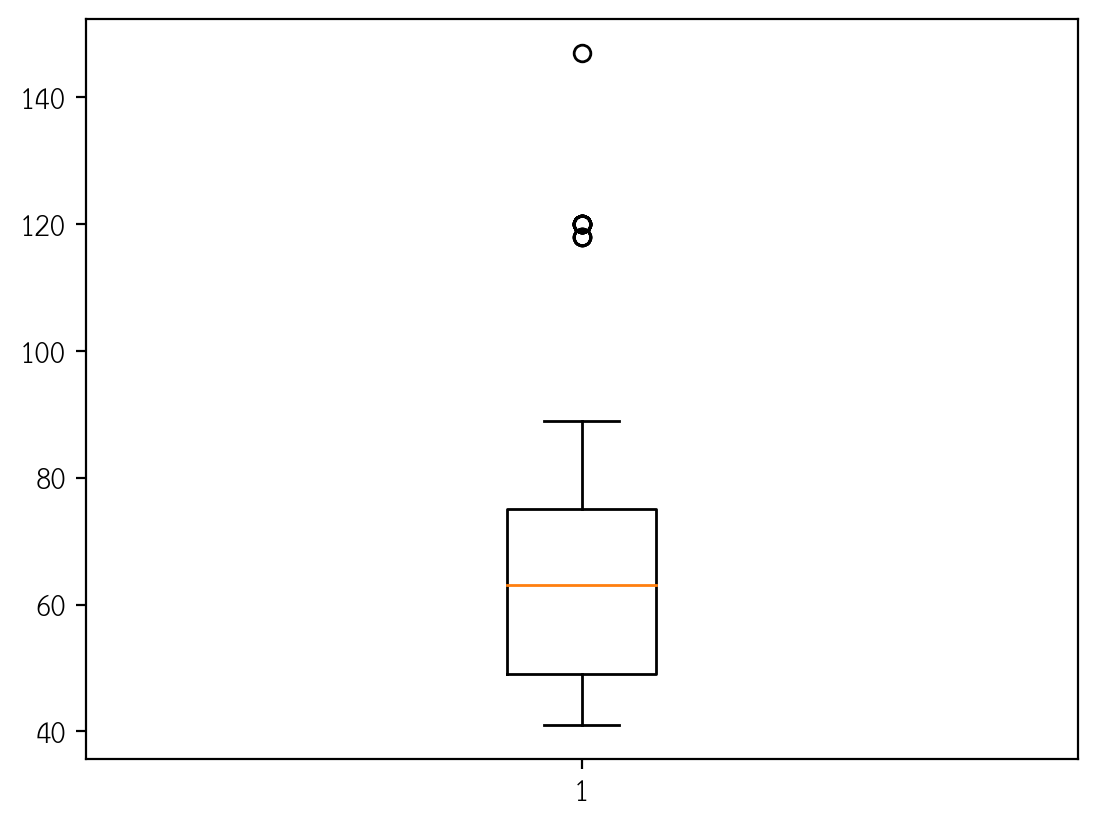

In [11]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79b38cf89ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x79b38cf8a3e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b38cf89c00>],
 'medians': [<matplotlib.lines.Line2D at 0x79b38cf8a920>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b38cf8abc0>],
 'means': []}

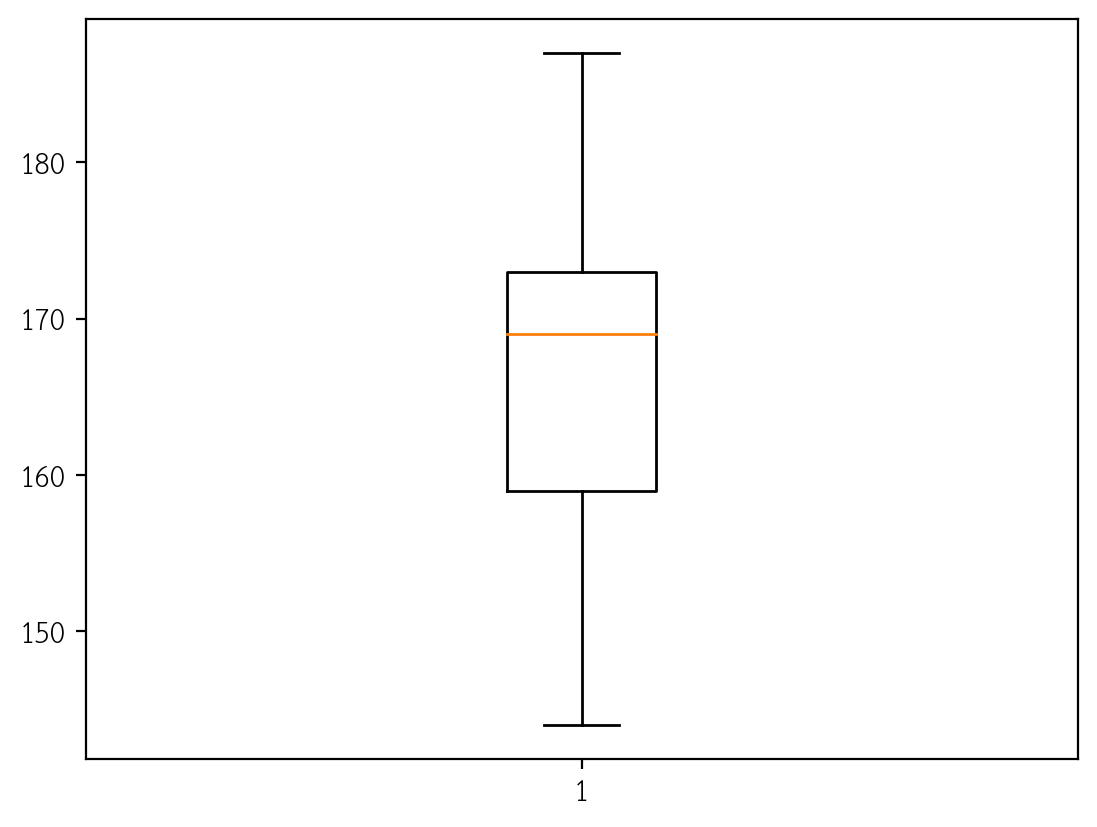

In [12]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79b38add3610>,
 'caps': [<matplotlib.lines.Line2D at 0x79b38add3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x79b38add3370>],
 'medians': [<matplotlib.lines.Line2D at 0x79b38ae0c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79b38ae0c370>],
 'means': []}

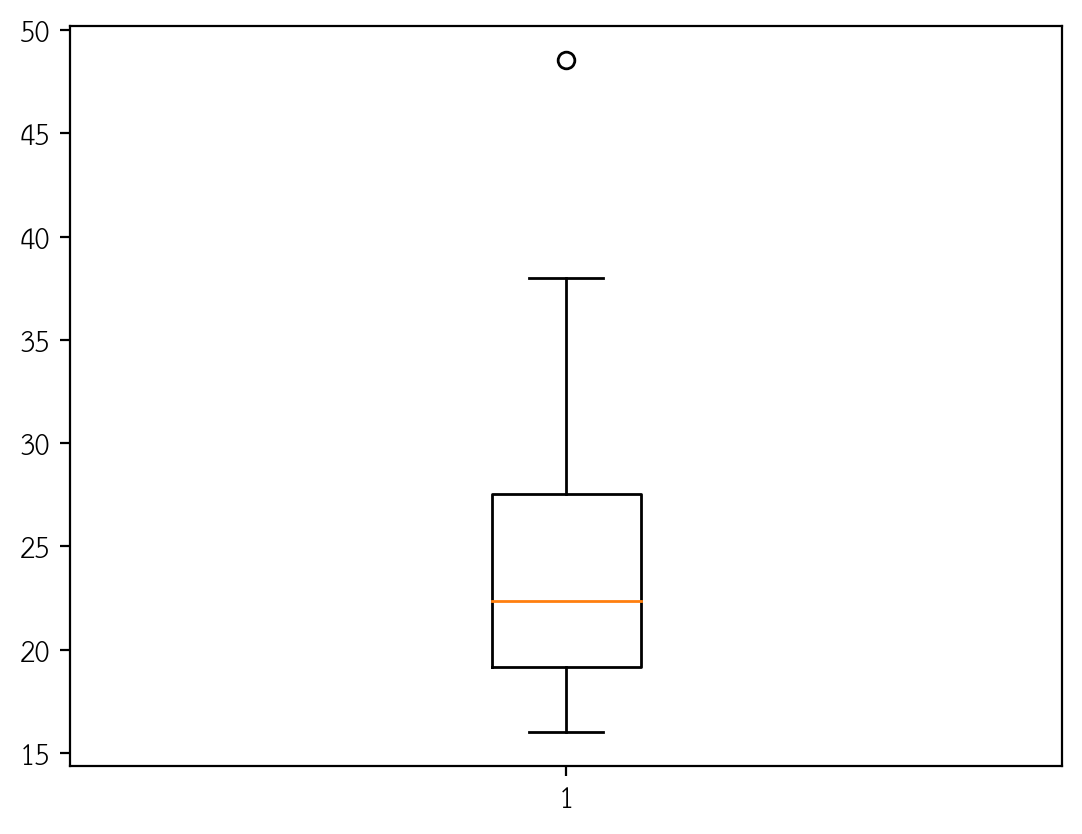

In [13]:
plt.boxplot(data['BMI'])



#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

In [ ]:
col = ['Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT']

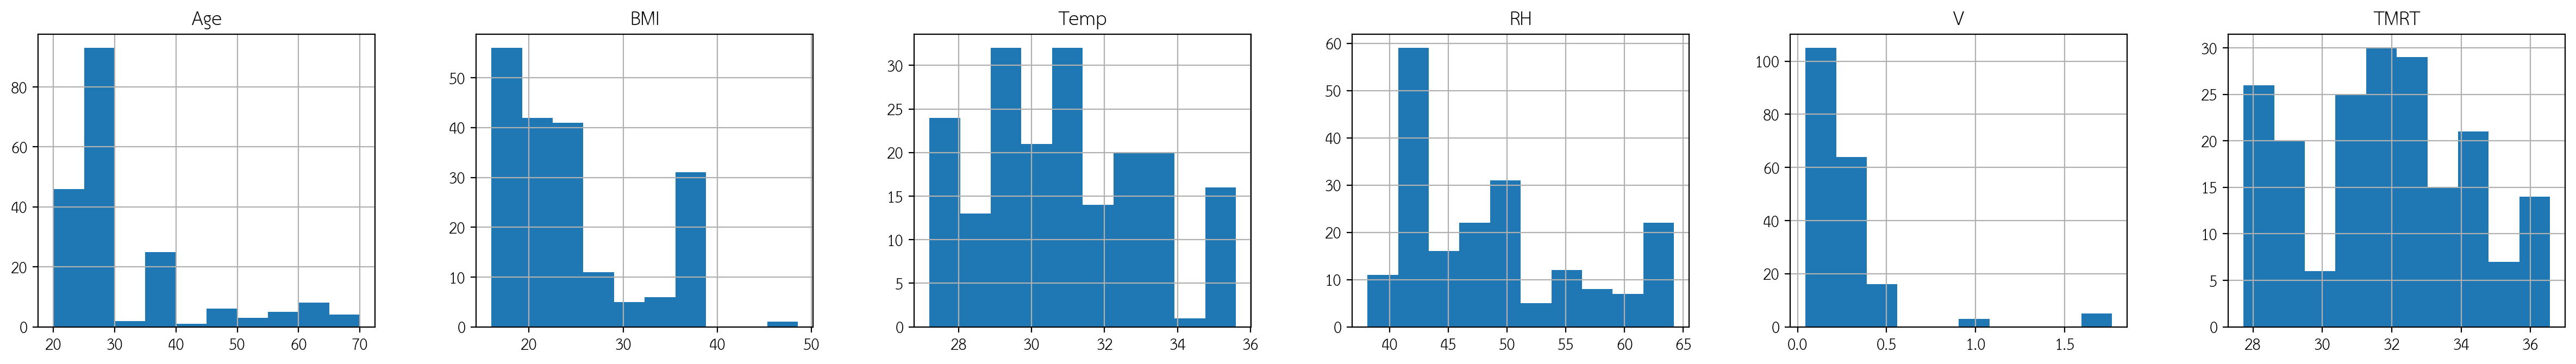

In [ ]:
data[col].hist(layout=(1, len(col)), figsize=(5 * len(col), 3.5));

##One hot Encoding

In [14]:
df = {'summer':0, 'winter':1}
data = data.copy()
for i in range(25,26):
  data.iloc[:,i] = data.iloc[:,i].map(df)


<ipython-input-14-d915ea9922ee>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,ชาย,27,49,169,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,1
1,ชาย,36,71,175,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,1,-1,0,30.628551,0.55,1.2,1
2,หญิง,25,89,153,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,0,0,0,30.628551,0.55,1.2,1
3,ชาย,29,75,165,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,1
4,ชาย,28,118,187,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,ชาย,37,88,180,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,0
189,หญิง,23,47,159,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,0
190,ชาย,27,47,169,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,0
191,ชาย,57,68,171,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,0


In [15]:
df = {'ชาย':0, 'หญิง':1}
data = data.copy()
for i in range(0,1):
  data.iloc[:,i] = data.iloc[:,i].map(df)


<ipython-input-15-2089121d44a0>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


In [16]:
df = {'Accept':0, 'Unaccept':1}
data = data.copy()
for i in range(10,11):
  data.iloc[:,i] = data.iloc[:,i].map(df)


<ipython-input-16-f73f5a57dcea>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


In [17]:
df = {'ภายนอก/ มีหลังคาคลุม':0, 'ภายใต้อาคาร':1,'ภายนอก / ใต้ร่มไม้':2,'ภายนอก/ กลางแจ้ง':3}
data = data.copy()
for i in range(5,6):
  data.iloc[:,i] = data.iloc[:,i].map(df)

<ipython-input-17-e73127a9a00e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i] = data.iloc[:,i].map(df)


##SMOTE

In [18]:
X = data.drop(['Thermal_acceptance'], axis =1)
y = data['Thermal_acceptance']

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X,y)

In [20]:
y_sm = pd.DataFrame(y_sm)#แก้ให้เป็นเดต้าเฟรม

In [21]:
data = pd.merge(X_sm,y_sm,left_index=True,right_index=True ,how='outer')
data

,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons,Thermal_acceptance
0,0,27,49,169,17.156262,0,30.500000,30.600000,42.900000,0.130000,...,0,-1,0,-1,0,30.628551,0.55,1.2,1,0
1,0,36,71,175,23.183673,0,30.500000,30.600000,42.900000,0.130000,...,0,0,1,-1,0,30.628551,0.55,1.2,1,0
2,1,25,89,153,38.019565,0,30.500000,30.600000,42.900000,0.130000,...,0,0,0,0,0,30.628551,0.55,1.2,1,0
3,0,29,75,165,27.548209,0,30.500000,30.600000,42.900000,0.130000,...,-1,0,0,-1,1,30.628551,0.55,1.2,1,0
4,0,28,118,187,33.744173,0,30.500000,30.600000,42.900000,0.130000,...,-1,-1,0,-1,0,30.628551,0.55,1.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,25,50,162,19.185393,2,35.200000,35.300000,50.700000,0.120000,...,-1,0,1,-1,-1,35.325760,0.55,1.2,0,1
340,1,32,51,159,20.196142,1,34.598240,34.744530,53.269050,0.168604,...,-1,0,1,-1,-1,34.801853,0.55,1.2,0,1
341,0,27,47,168,16.596374,2,34.530523,34.630523,50.508721,0.158256,...,-1,0,1,-1,-1,34.662071,0.55,1.2,0,1
342,0,35,70,174,23.201039,2,31.422888,32.221798,42.422343,0.280654,...,-1,0,1,-1,-1,32.608625,0.55,1.2,0,1


#แบ่งกลุ่มข้อมูล

In [22]:
def convert_to_buckets(Age):
    if 20 <= Age <= 39:
          return 'วัยหนุ่มสาว'
    elif 40 <= Age <= 59:
          return 'วัยกลางคน'
    else:
        return 'วัยชรา'

In [23]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

วัยหนุ่มสาว    294
วัยกลางคน       35
วัยชรา          15
Name: age_cat, dtype: int64

<Axes: >

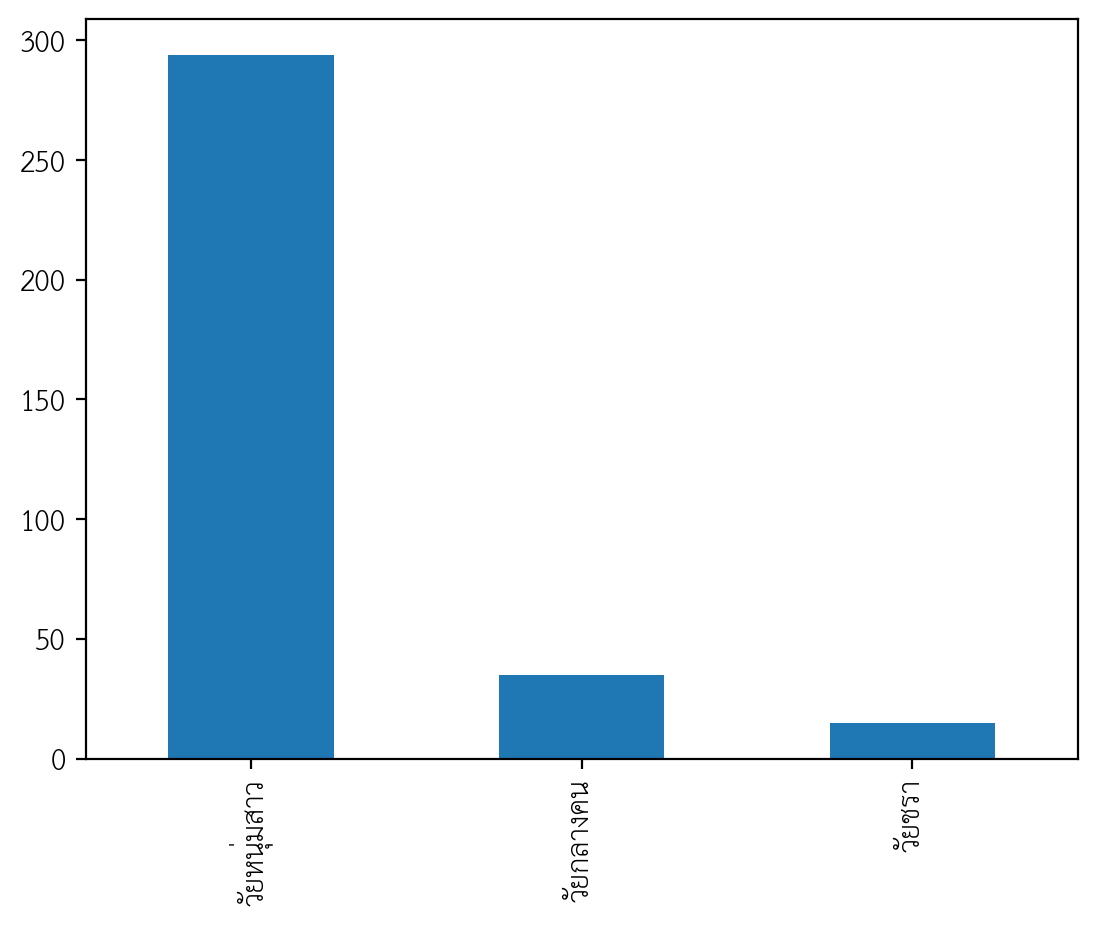

In [24]:
data['age_cat'].value_counts().plot(kind='bar')

In [25]:
def convert_to_buckets(V):
    if V < 0.29:
          return 'ลมสงบ'
    elif V < 1.6:
          return 'ลมเบา'
    else:
        return 'ลมอ่อน'

In [26]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

ลมสงบ     245
ลมเบา      94
ลมอ่อน      5
Name: v_cat, dtype: int64

<Axes: >

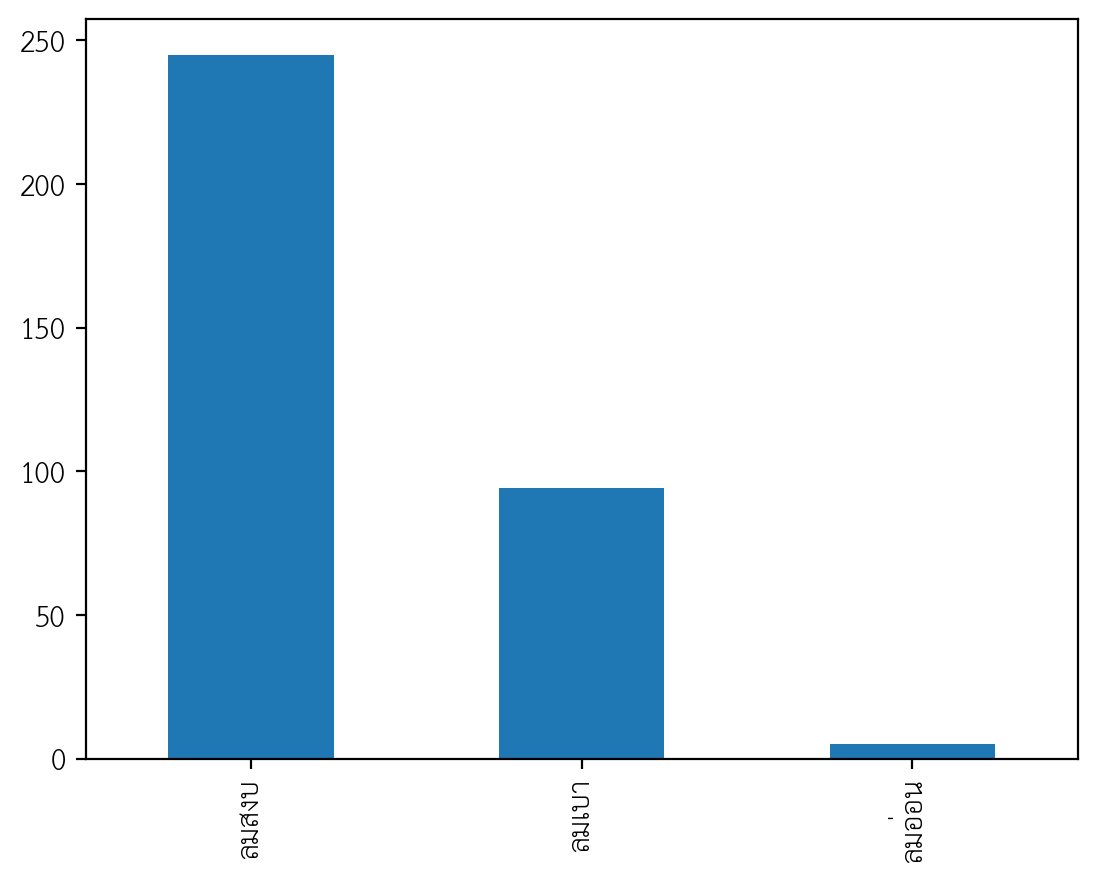

In [27]:
data['v_cat'].value_counts().plot(kind='bar')

In [28]:
def convert_to_buckets(RH):
    if RH < 40:
          return 'แห้งเกินไป'
    elif RH < 60:
          return 'ความชื้นเหมาะสม'
    else:
        return 'ชื้นเกินไป'

In [29]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

ความชื้นเหมาะสม    303
ชื้นเกินไป          33
แห้งเกินไป           8
Name: rh_cat, dtype: int64

<Axes: >

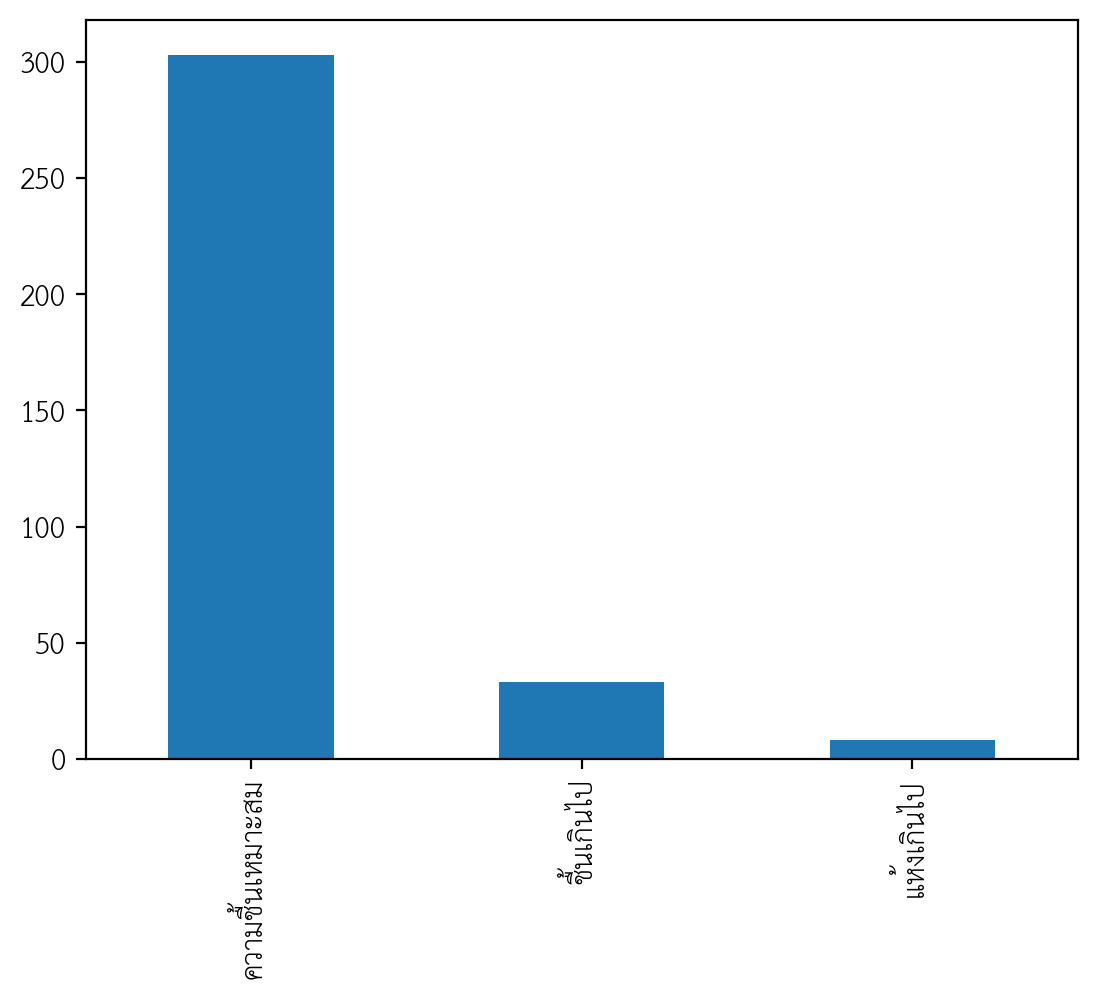

In [30]:
data['rh_cat'].value_counts().plot(kind='bar')

In [31]:
def convert_to_buckets(BMI):
    if BMI < 18.5:
          return 'น้ำหนักต่ำกว่าเกณฑ์'
    elif 18.5 < BMI <= 22.9:
          return 'สมส่วน'
    elif 23 <= BMI <= 24.9:
          return 'น้ำหนักเกิน'
    elif 25 <= BMI <= 29.9:
          return 'โรคอ้วนระดับที่ 1'
    else:
          return 'โรคอ้วนระดับที่ 2'

In [32]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

สมส่วน                 145
น้ำหนักต่ำกว่าเกณฑ์     70
น้ำหนักเกิน             57
โรคอ้วนระดับที่ 2       44
โรคอ้วนระดับที่ 1       28
Name: bmi_cat, dtype: int64

<Axes: >

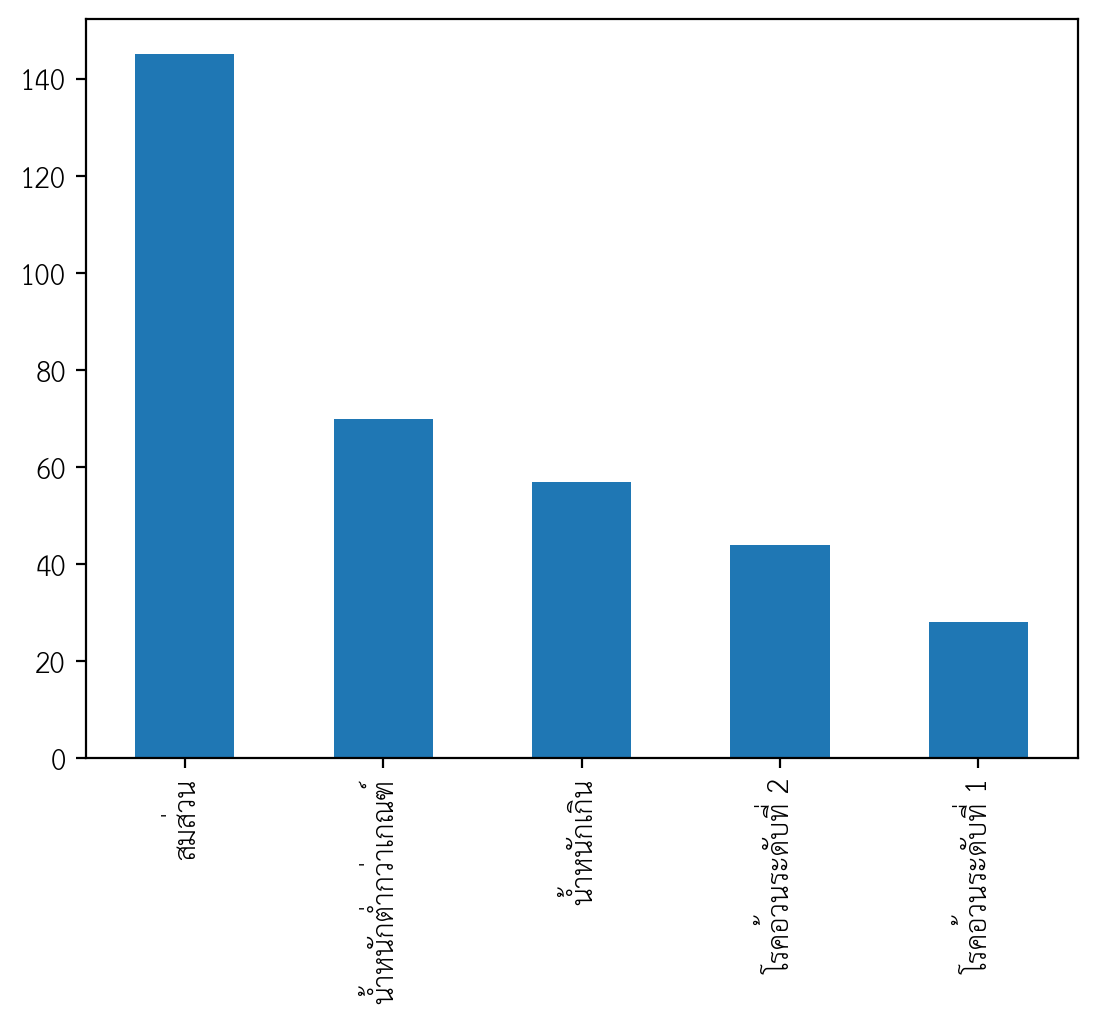

In [33]:
data['bmi_cat'].value_counts().plot(kind='bar')

In [34]:
def convert_to_buckets(Temp):
    if 23 <= Temp <= 28.9:
          return 'อากาศค่อนข้างเย็น'
    elif 29 <= Temp <= 34.9:
          return 'อากาศค่อนข้างร้อน'
    elif 35.0 <= Temp <= 39.9:
          return 'อากาศร้อน'

In [35]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

อากาศค่อนข้างร้อน    252
อากาศร้อน             49
อากาศค่อนข้างเย็น     40
Name: temp_cat, dtype: int64

<Axes: >

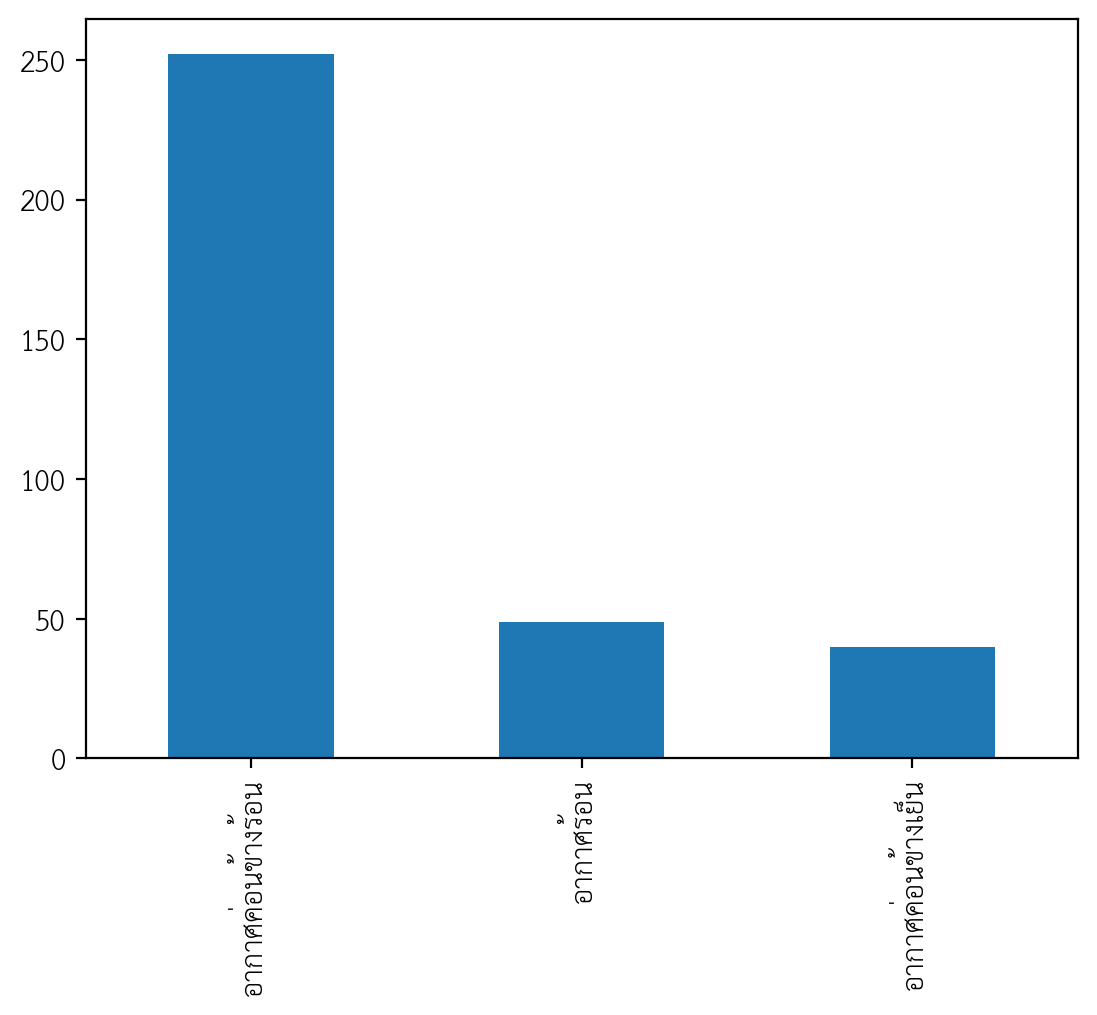

In [36]:
data['temp_cat'].value_counts().plot(kind='bar')

<Axes: >

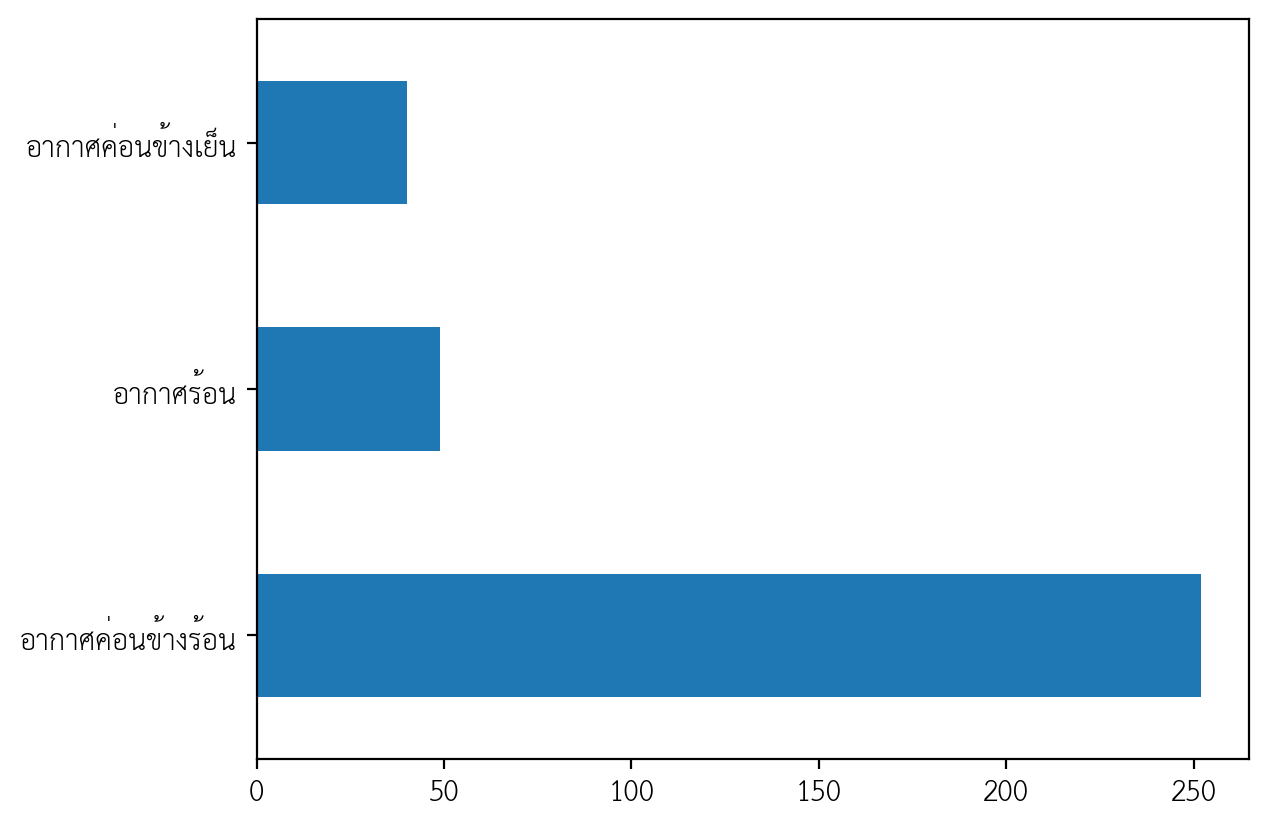

In [37]:
data['temp_cat'].value_counts().plot(kind='barh')

<Axes: >

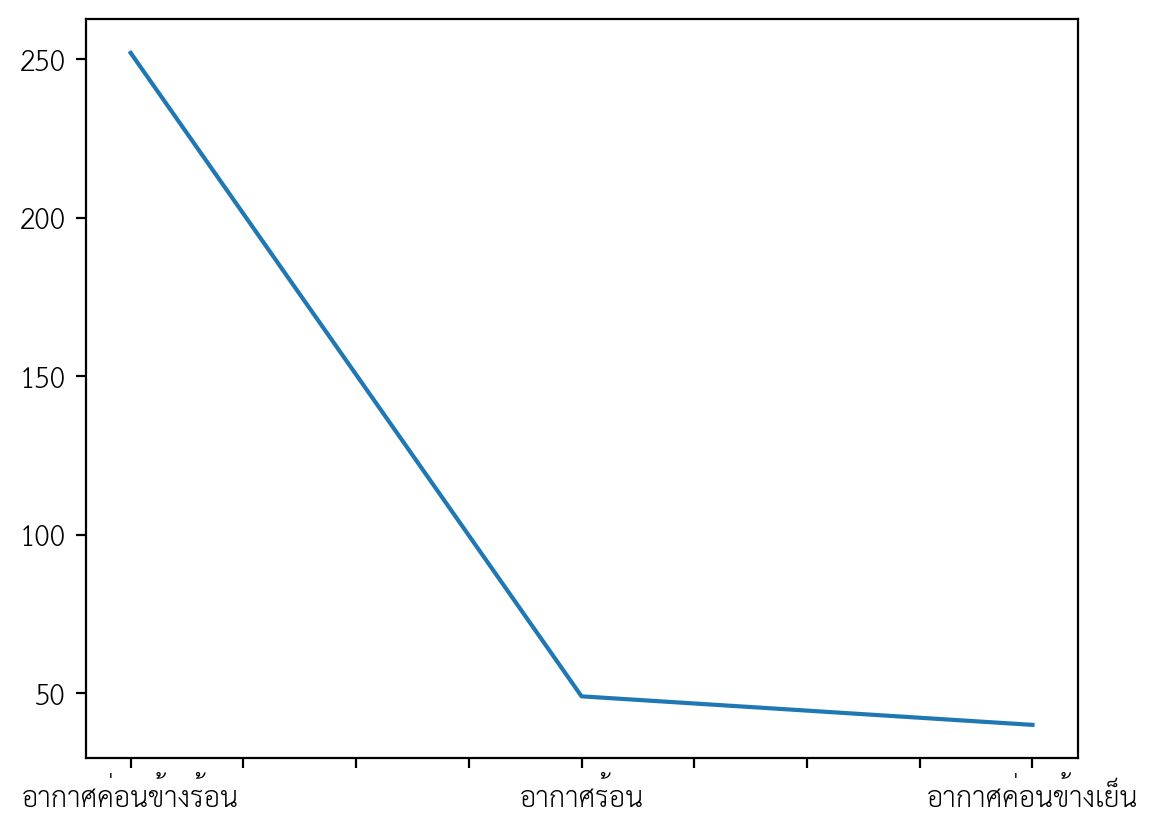

In [38]:
data['temp_cat'].value_counts().plot()

In [39]:
df = {0:'summer', 1:'winter'}
data = data.copy()
for i in range(24,25):
  data.iloc[:,i] = data.iloc[:,i].map(df)

In [40]:
df = {0:'ชาย', 1:'หญิง'}
data = data.copy()
for i in range(0,1):
  data.iloc[:,i] = data.iloc[:,i].map(df)

In [41]:
df = {0:'Accept', 1:'Unaccept'}
data = data.copy()
for i in range(25,26):
  data.iloc[:,i] = data.iloc[:,i].map(df)

In [42]:
df = {0:'ภายนอก/ มีหลังคาคลุม', 1:'ภายใต้อาคาร',2:'ภายนอก / ใต้ร่มไม้',3:'ภายนอก/ กลางแจ้ง'}
data = data.copy()
for i in range(5,6):
  data.iloc[:,i] = data.iloc[:,i].map(df)
data

,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,TMRT,Clo,Met,seasons,Thermal_acceptance,age_cat,v_cat,rh_cat,bmi_cat,temp_cat
0,ชาย,27,49,169,17.156262,ภายนอก/ มีหลังคาคลุม,30.500000,30.600000,42.900000,0.130000,...,30.628551,0.55,1.2,winter,Accept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน
1,ชาย,36,71,175,23.183673,ภายนอก/ มีหลังคาคลุม,30.500000,30.600000,42.900000,0.130000,...,30.628551,0.55,1.2,winter,Accept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,น้ำหนักเกิน,อากาศค่อนข้างร้อน
2,หญิง,25,89,153,38.019565,ภายนอก/ มีหลังคาคลุม,30.500000,30.600000,42.900000,0.130000,...,30.628551,0.55,1.2,winter,Accept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน
3,ชาย,29,75,165,27.548209,ภายนอก/ มีหลังคาคลุม,30.500000,30.600000,42.900000,0.130000,...,30.628551,0.55,1.2,winter,Accept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน
4,ชาย,28,118,187,33.744173,ภายนอก/ มีหลังคาคลุม,30.500000,30.600000,42.900000,0.130000,...,30.628551,0.55,1.2,winter,Accept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,หญิง,25,50,162,19.185393,ภายนอก / ใต้ร่มไม้,35.200000,35.300000,50.700000,0.120000,...,35.325760,0.55,1.2,summer,Unaccept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,สมส่วน,อากาศร้อน
340,หญิง,32,51,159,20.196142,ภายใต้อาคาร,34.598240,34.744530,53.269050,0.168604,...,34.801853,0.55,1.2,summer,Unaccept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,สมส่วน,อากาศค่อนข้างร้อน
341,ชาย,27,47,168,16.596374,ภายนอก / ใต้ร่มไม้,34.530523,34.630523,50.508721,0.158256,...,34.662071,0.55,1.2,summer,Unaccept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน
342,ชาย,35,70,174,23.201039,ภายนอก / ใต้ร่มไม้,31.422888,32.221798,42.422343,0.280654,...,32.608625,0.55,1.2,summer,Unaccept,วัยหนุ่มสาว,ลมสงบ,ความชื้นเหมาะสม,น้ำหนักเกิน,อากาศค่อนข้างร้อน


#Association Rules

In [43]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=bd384683ef0088f6b4bd8856de0430e7dbec889a6c663a1d49a66ee02fc804ed
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [44]:
!pip install mlxtend

In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   เพศ                     344 non-null    object 
 1   Age                     344 non-null    int64  
 2   Weight                  344 non-null    int64  
 3   Height                  344 non-null    int64  
 4   BMI                     344 non-null    float64
 5   พื้นที่ทำแบบสอบถาม      344 non-null    object 
 6   Temp                    344 non-null    float64
 7   Globe temp              344 non-null    float64
 8   RH                      344 non-null    float64
 9   V                       344 non-null    float64
 10  Thermal_sensation_Vote  344 non-null    int64  
 11  อุณหภูมิ                344 non-null    int64  
 12  ความชื้น                344 non-null    int64  
 13  กระแสลม                 344 non-null    int64  
 14  ความแรงของแสงแดด        344 non-null    in

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ##fo mapping

In [52]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดอุณหภูมิ(TS)',
    1:'รู้สึกน้อยอุณหภูมิ(TS)',
    2:'รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)',
    3:'รู้สึกปานกลางอุณหภูมิ(TS)',
    4:'รู้สึกค่อนข้างมากอุณหภูมิ(TS)',
    5:'รู้สึกมากอุณหภูมิ(TS)',
    6:'รู้สึกมากที่สุดอุณหภูมิ(TS)'
}

data['อุณหภูมิ(TS)'] = data['อุณหภูมิ'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความชื้น(TS)',
    1:'รู้สึกน้อยความชื้น(TS)',
    2:'รู้สึกค่อนข้างน้อยความชื้น(TS)',
    3:'รู้สึกปานกลางความชื้น(TS)',
    4:'รู้สึกค่อนข้างมากความชื้น(TS)',
    5:'รู้สึกมากความชื้น(TS)',
    6:'รู้สึกมากที่สุดความชื้น(TS)'
}

data['ความชื้น(TS)'] = data['ความชื้น'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดกระแสลม(TS)',
    1:'รู้สึกน้อยกระแสลม(TS)',
    2:'รู้สึกค่อนข้างน้อยกระแสลม(TS)',
    3:'รู้สึกปานกลางกระแสลม(TS)',
    4:'รู้สึกค่อนข้างมากกระแสลม(TS)',
    5:'รู้สึกมากกระแสลม(TS)',
    6:'รู้สึกมากที่สุดกระแสลม(TS)'
}

data['กระแสลม(TS)'] = data['กระแสลม'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)',
    1:'รู้สึกน้อยความแรงของแสงแดด(TS)',
    2:'รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)',
    3:'รู้สึกปานกลางความแรงของแสงแดด(TS)',
    4:'รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)',
    5:'รู้สึกมากความแรงของแสงแดด(TS)',
    6:'รู้สึกมากที่สุดความแรงของแสงแดด(TS)'
}

data['ความแรงของแสงแดด(TS)'] = data['ความแรงของแสงแดด'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)',
    1:'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)',
    2:'รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)',
    3:'รู้สึกปานกลางเหงื่อบริเวณผิวหนัง(TS)',
    4:'รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)',
    5:'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)',
    6:'รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'
}

data['เหงื่อบริเวณผิวหนัง(TS)'] = data['เหงื่อบริเวณผิวหนัง'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
fo_mapping = {
    -1 :'ลดน้อยลงอุณหภูมิ(PT)',
    0 :'เท่าเดิมอุณหภูมิ(PT)',
    1 :'เพิ่มมากขึ้นอุณหภูมิ(PT)'
}

data['อุณหภูมิ(PT)'] = data['ความร้อน'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
fo_mapping = {
    -1 :'ลดน้อยลงความชื้น(PT)',
    0 :'เท่าเดิมความชื้น(PT)',
    1 :'เพิ่มมากขึ้นความชื้น(PT)'
}

data['ความชื้น(PT)'] = data['ความชื้น.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
fo_mapping = {
    -1 :'ลดน้อยลงกระแสลม(PT)',
    0 :'เท่าเดิมกระแสลม(PT)',
    1 :'เพิ่มมากขึ้นกระแสลม(PT)'
}

data['กระแสลม(PT)'] = data['กระแสลม.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
fo_mapping = {
    -1 :'ลดน้อยลงความแรงของแสงแดด(PT)',
    0 :'เท่าเดิมความแรงของแสงแดด(PT)',
    1 :'เพิ่มมากขึ้นความแรงของแสงแดด(PT)'
}

data['ความแรงของแสงแดด(PT)'] = data['แสงแดด'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
fo_mapping = {
    -1 :'ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)',
    0 :'เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)',
    1 :'เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)'
}

data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_sensation_Vote', 'อุณหภูมิ',
       'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง',
       'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons',
       'Thermal_acceptance', 'age_cat', 'v_cat', 'rh_cat', 'bmi_cat',
       'temp_cat', 'อุณหภูมิ(TS)', 'ความชื้น(TS)', 'กระแสลม(TS)',
       'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)',
       'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
       'เหงื่อบริเวณผิวหนัง(PT)'],
      dtype='object')

##รวมกลุ่ม

In [63]:
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'

data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างมากอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกมากที่สุดอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-63-5f6fe782cb98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
<ipython-input-63-5f6fe782cb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อ

In [64]:
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างน้อยความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'

data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างมากความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกมากที่สุดความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-26a41711dd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
<ipython-input-64-26a41711dd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ค

In [65]:
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างน้อยกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'

data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างมากกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกมากที่สุดกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-caaa4db41cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
<ipython-input-65-caaa4db41cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแส

In [66]:
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'

data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกมากที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-66-3de1c74c649c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
<ipython-input-66-3de1c74c649c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [67]:
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'

data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-227ae1d64912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
<ipython-input-67-227ae1d64912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

##frequently plot (10 variable)

<Axes: >

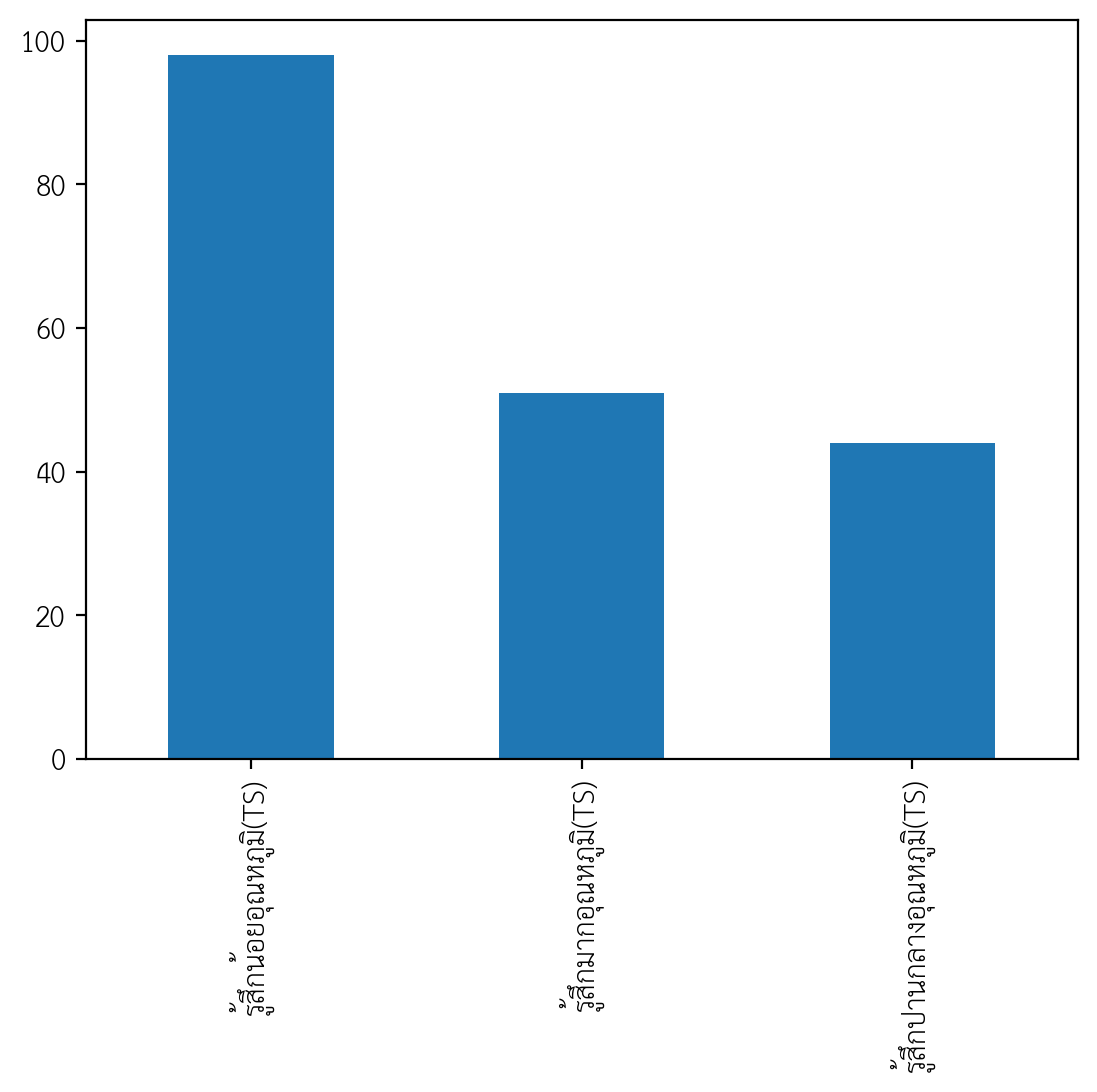

In [ ]:
data['อุณหภูมิ(TS)'].value_counts().plot(kind='bar')

<Axes: >

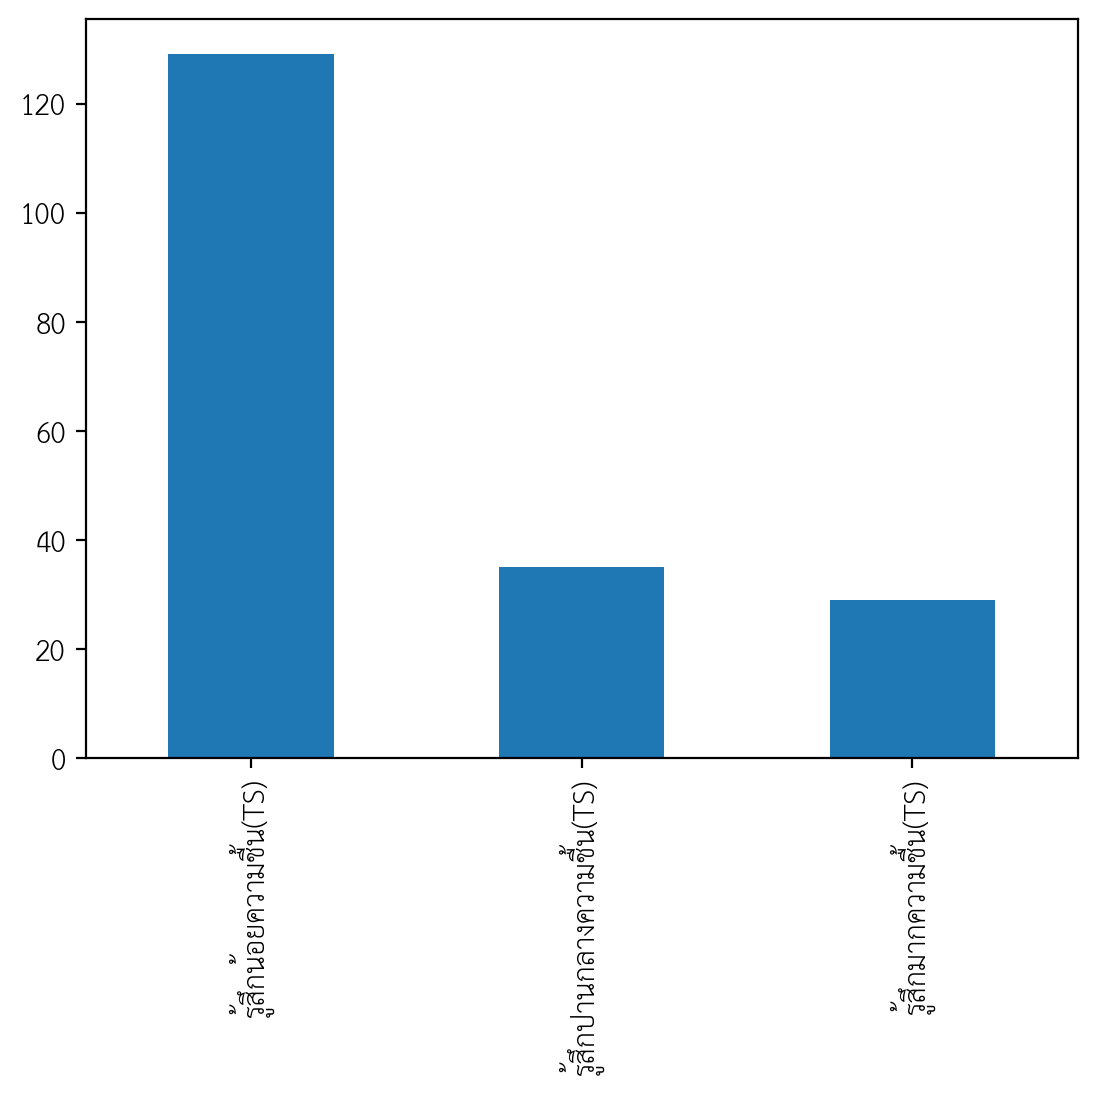

In [ ]:
data['ความชื้น(TS)'].value_counts().plot(kind='bar')

<Axes: >

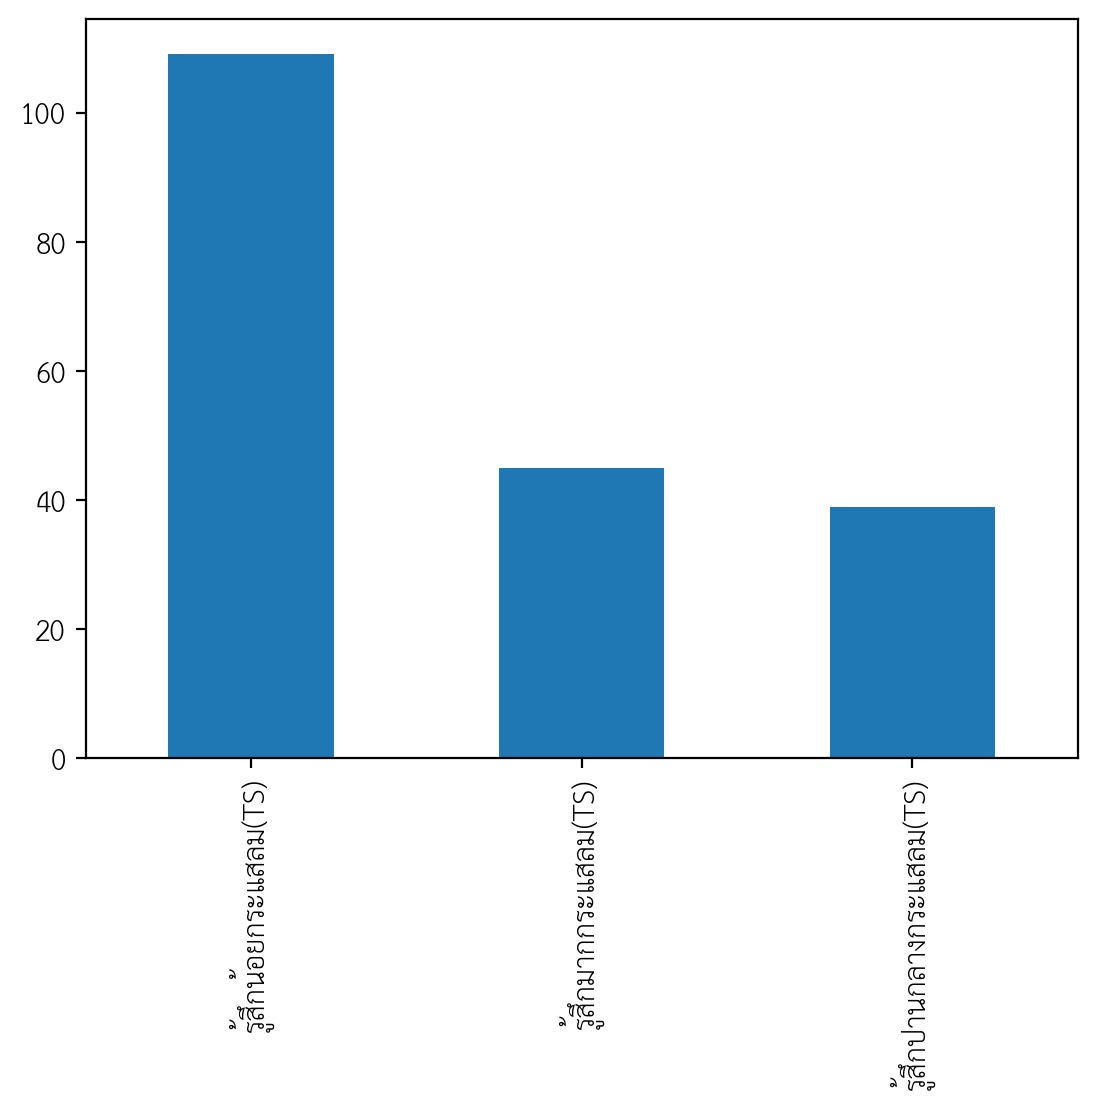

In [ ]:
data['กระแสลม(TS)'].value_counts().plot(kind='bar')

<Axes: >

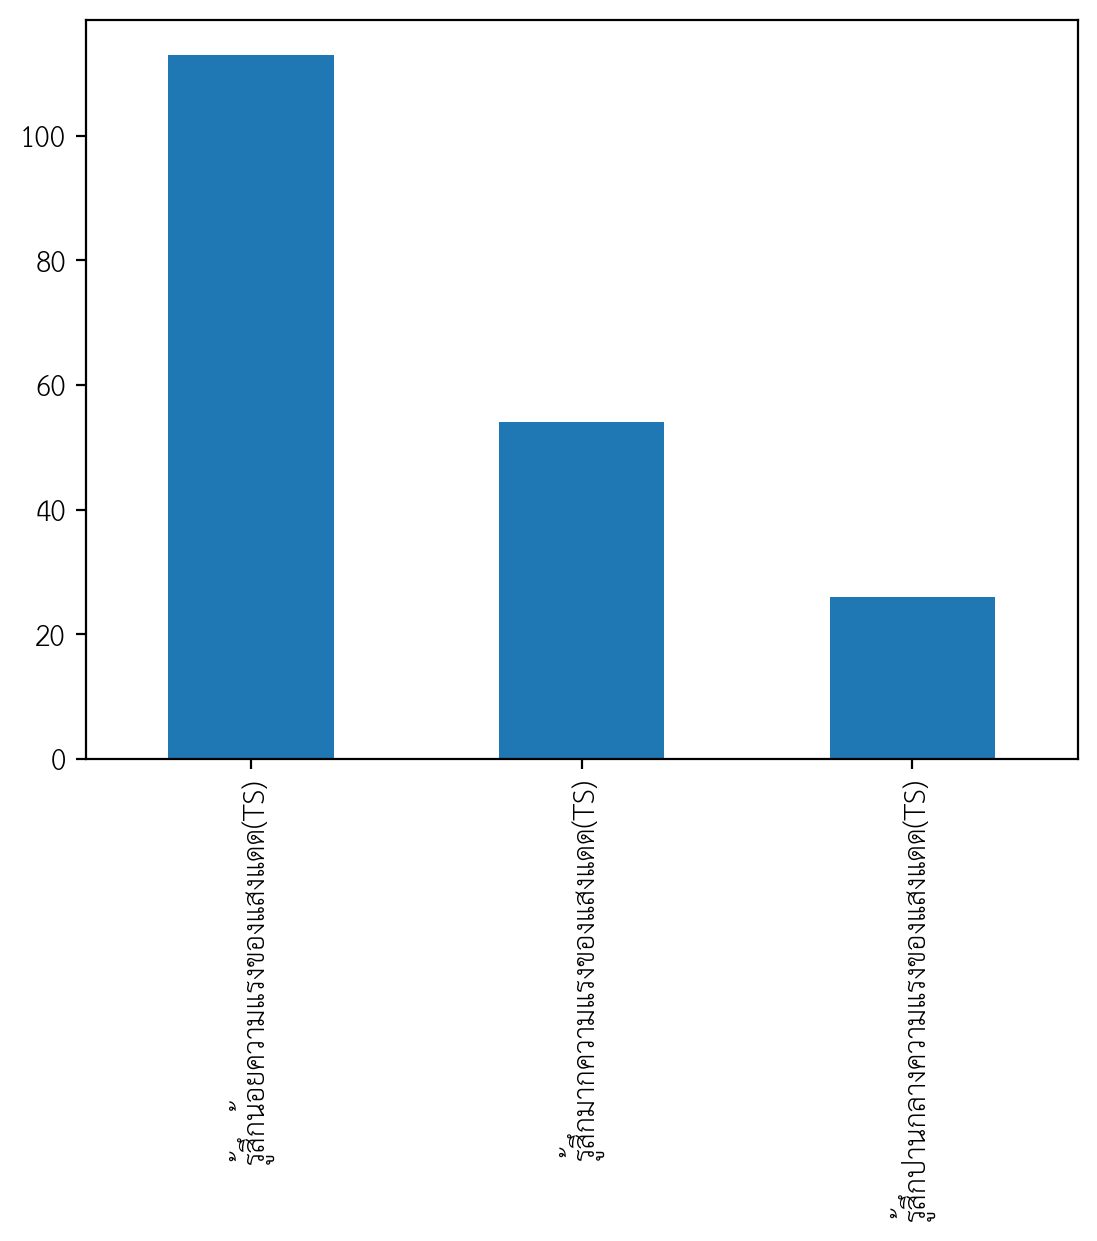

In [ ]:
data['ความแรงของแสงแดด(TS)'].value_counts().plot(kind='bar')

<Axes: >

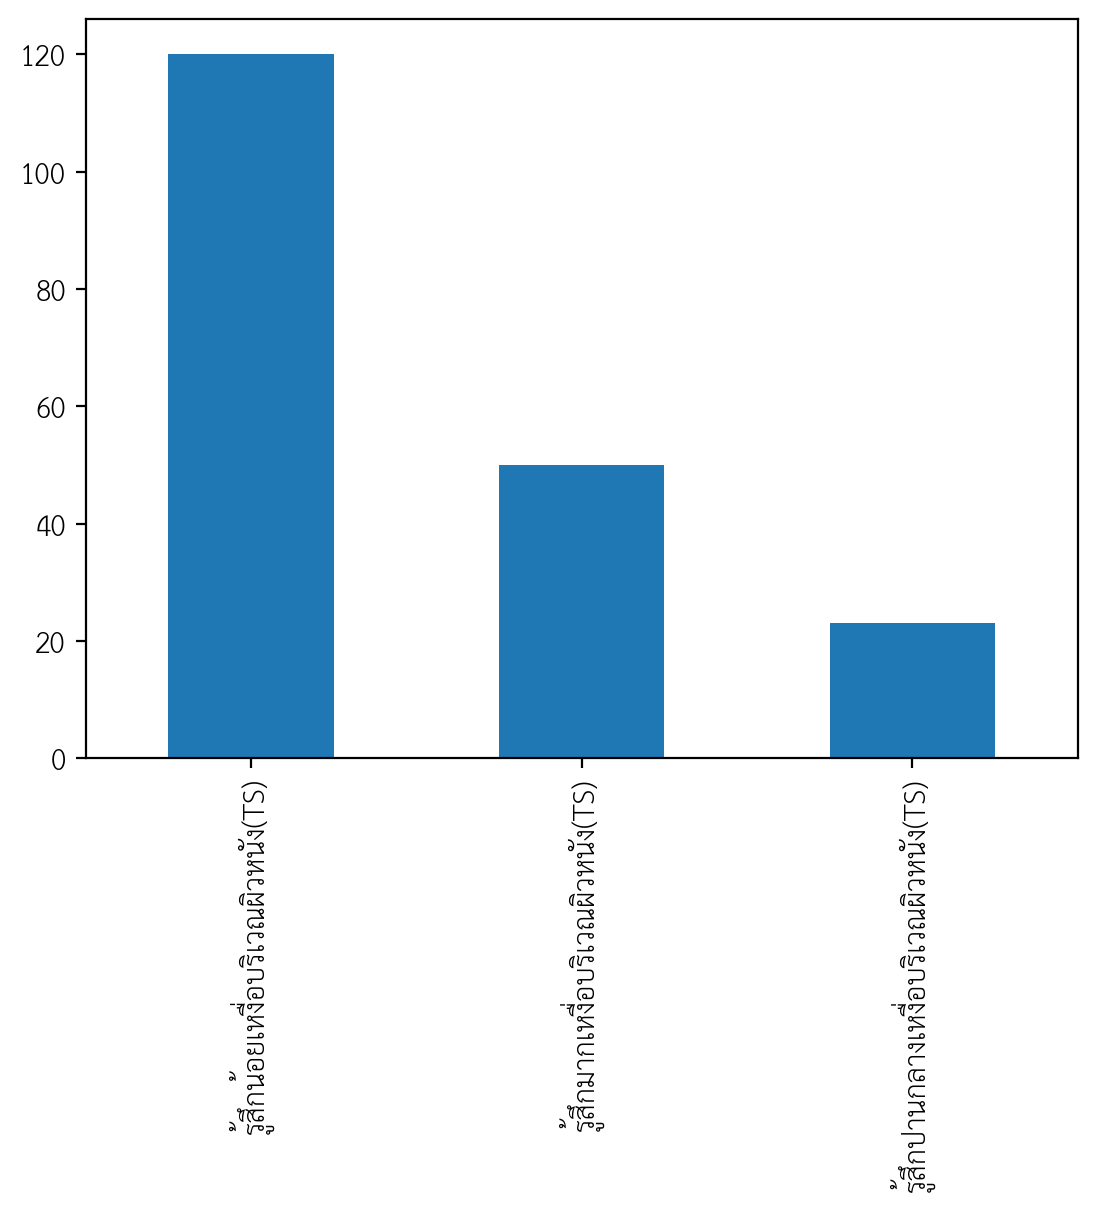

In [ ]:
data['เหงื่อบริเวณผิวหนัง(TS)'].value_counts().plot(kind='bar')

<Axes: >

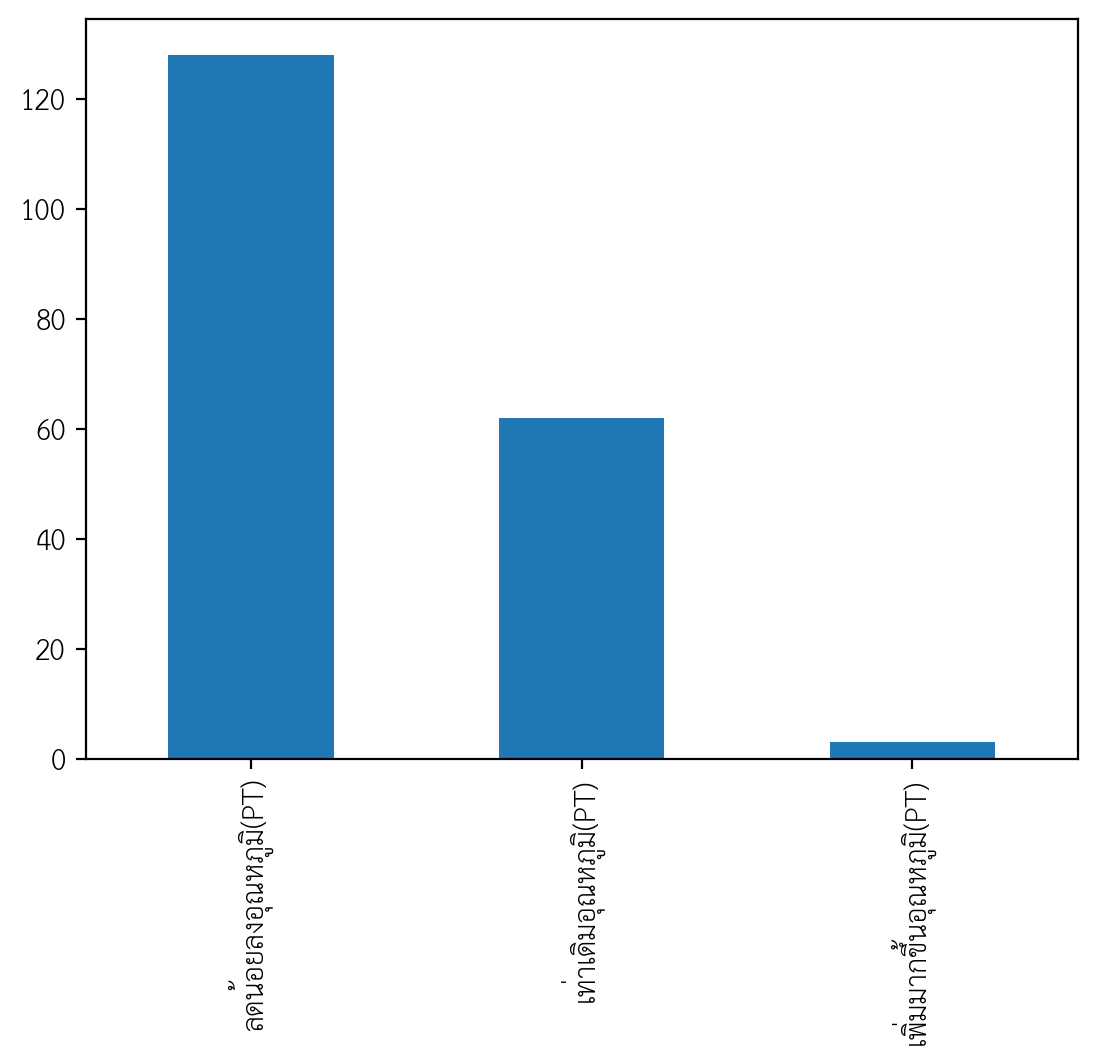

In [ ]:
data['อุณหภูมิ(PT)'].value_counts().plot(kind='bar')

<Axes: >

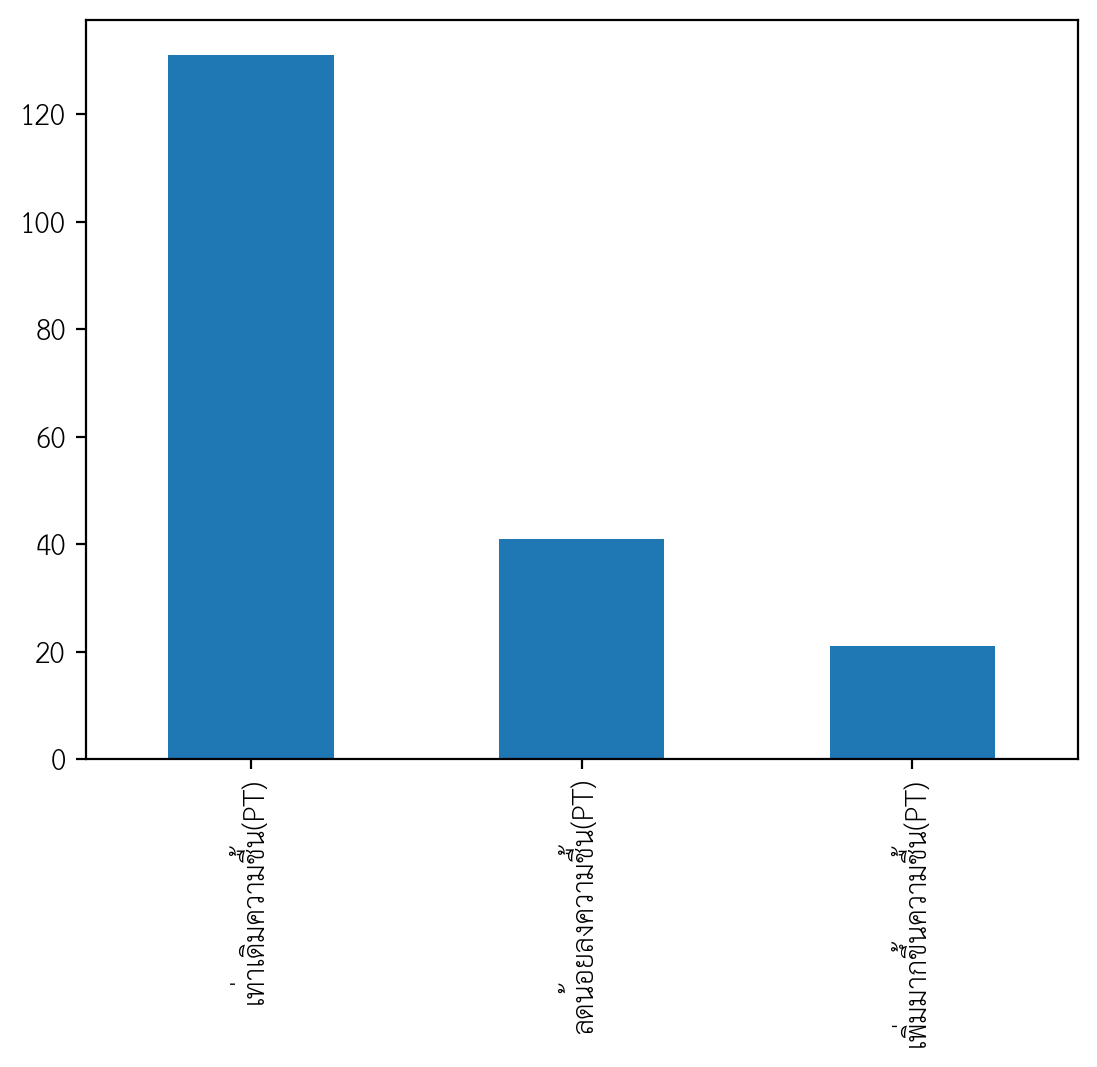

In [ ]:
data['ความชื้น(PT)'].value_counts().plot(kind='bar')

<Axes: >

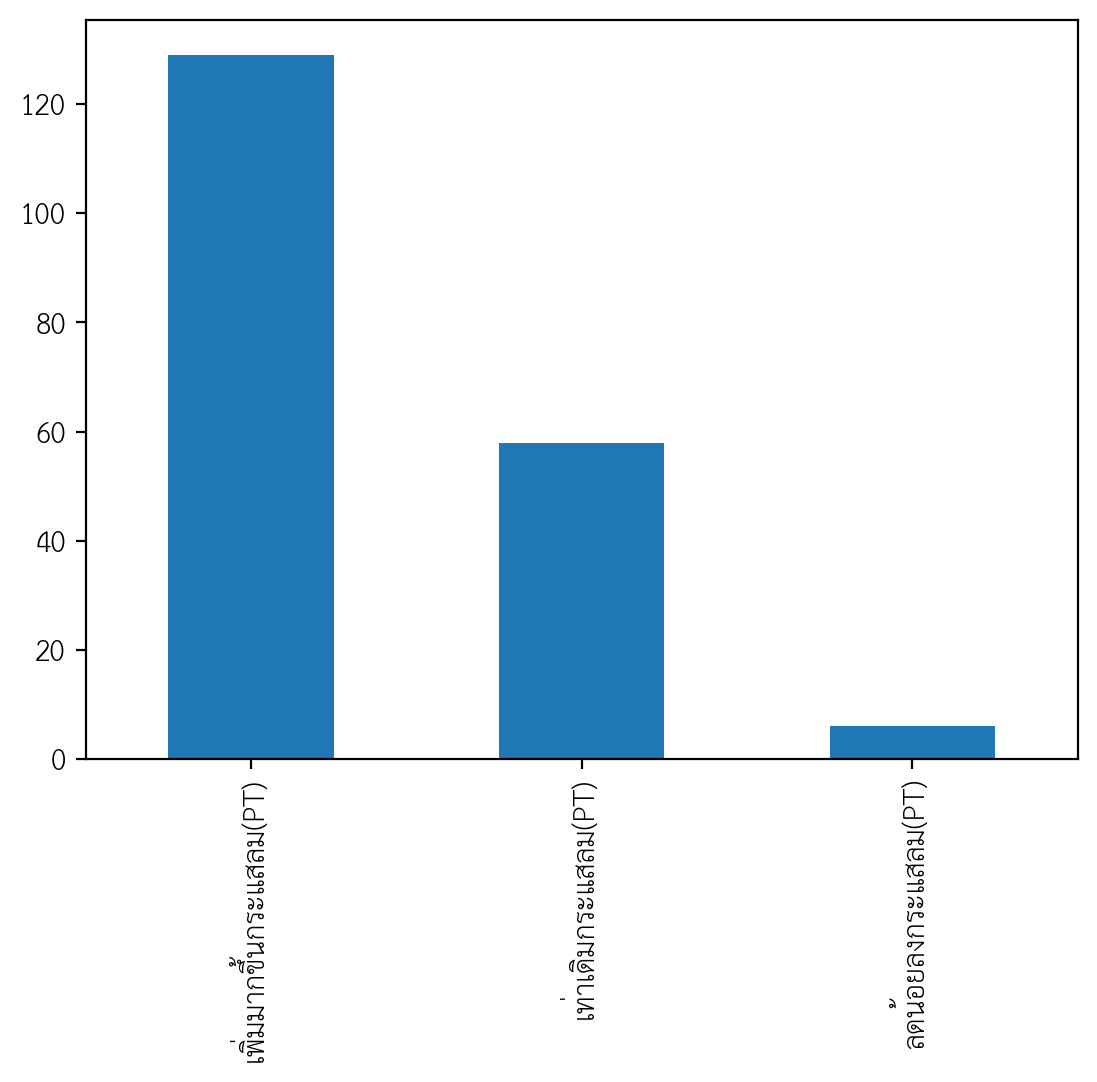

In [ ]:
data['กระแสลม(PT)'].value_counts().plot(kind='bar')

<Axes: >

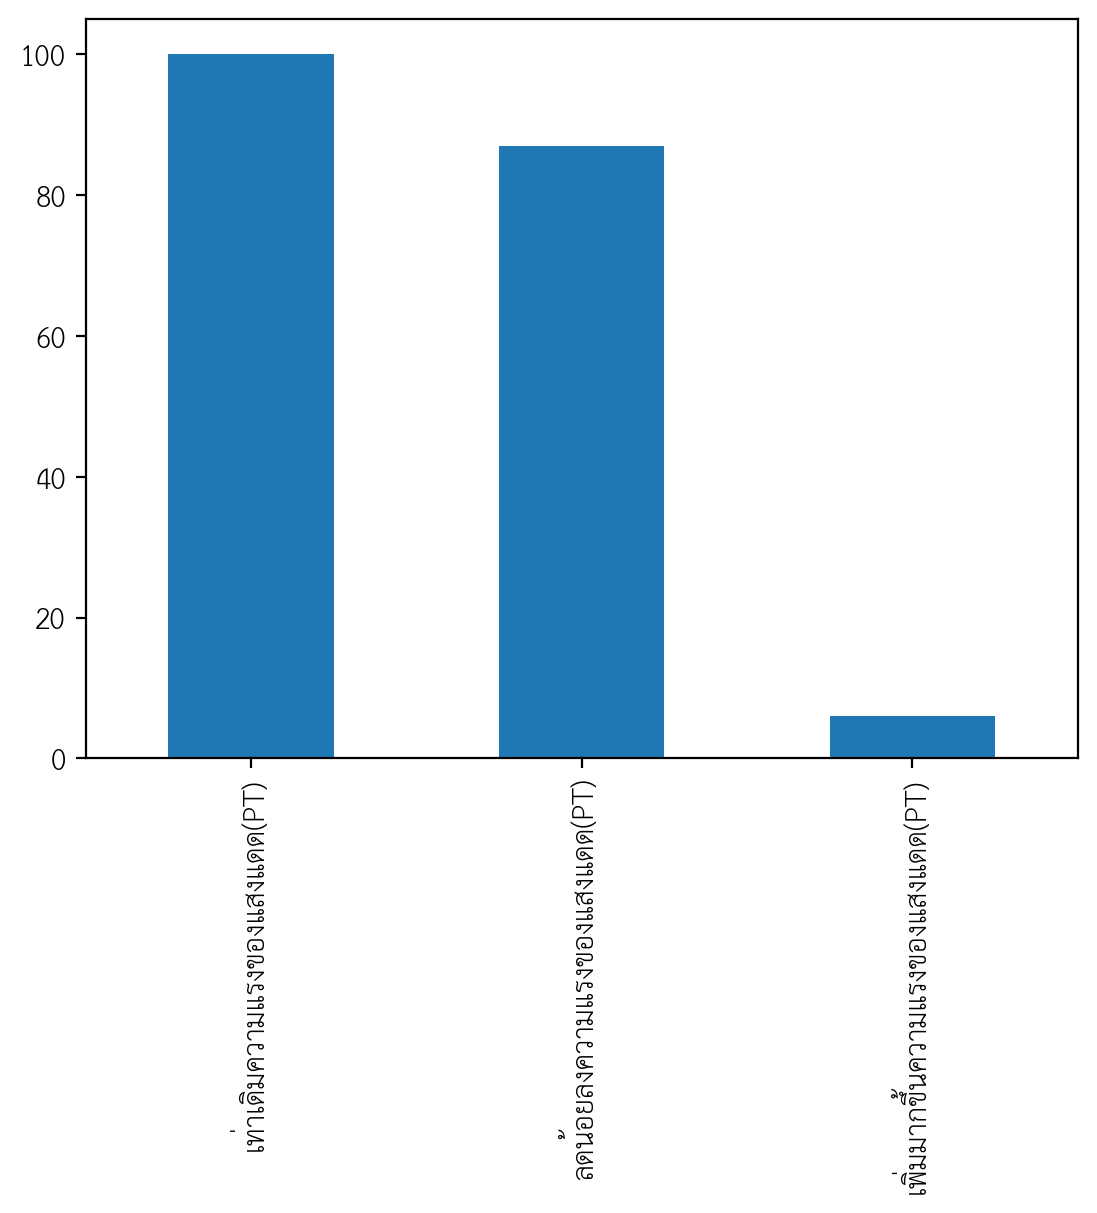

In [ ]:
data['ความแรงของแสงแดด(PT)'].value_counts().plot(kind='bar')

<Axes: >

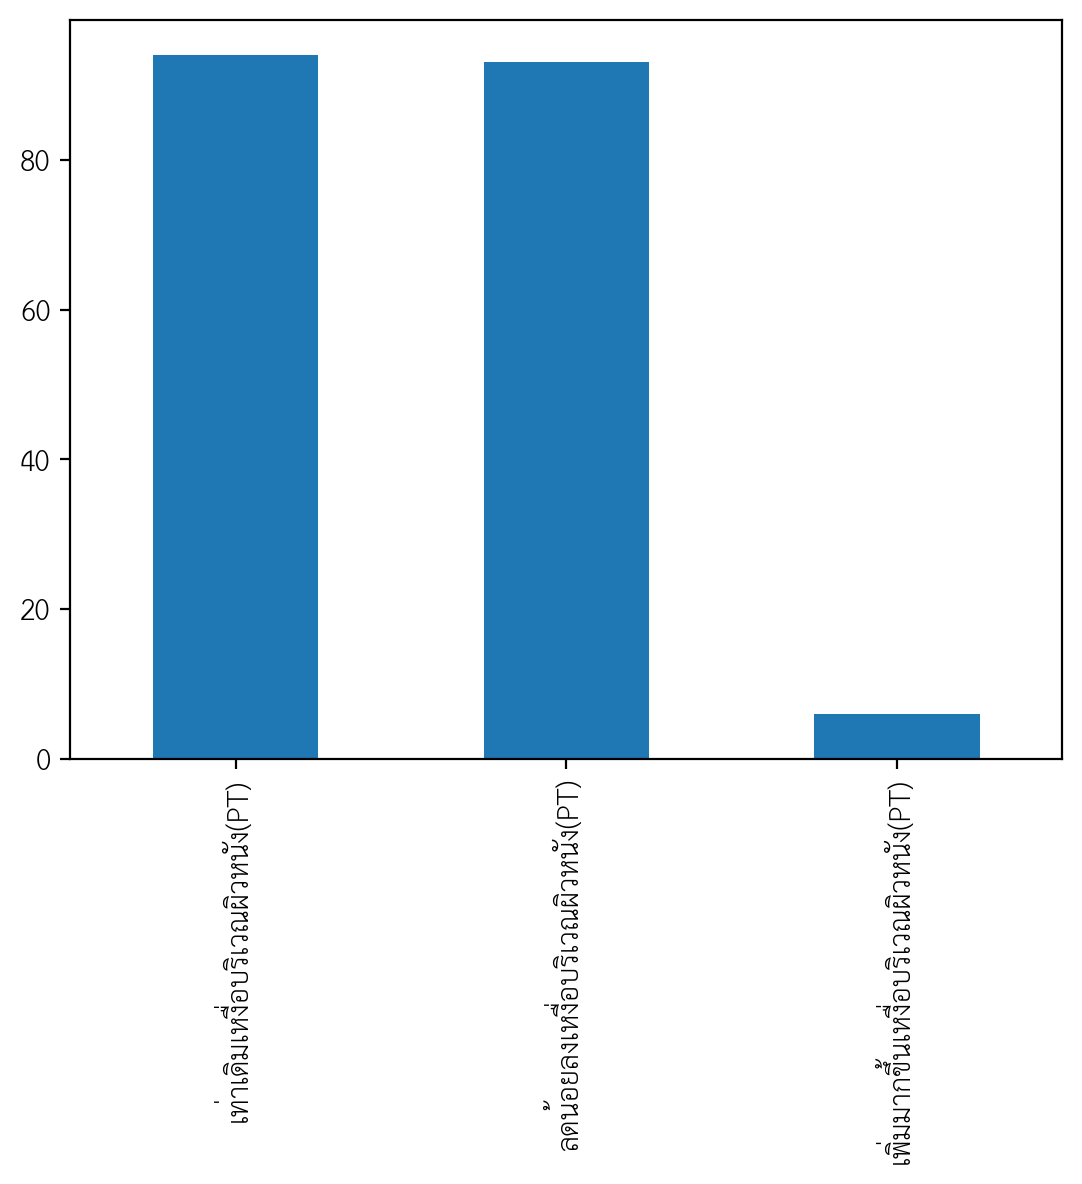

In [ ]:
data['เหงื่อบริเวณผิวหนัง(PT)'].value_counts().plot(kind='bar')

In [ ]:
data.columns

Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_acceptance', 'Thermal_sensation_Vote',
       'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด',
       'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons', 'age_cat',
       'v_cat', 'rh_cat', 'bmi_cat', 'temp_cat', 'อุณหภูมิ(TS)',
       'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)',
       'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)',
       'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)',
       'Thermal_Sensation_Vote'],
      dtype='object')

In [ ]:
fo_mapping = {
    -1 :'ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)',
    0 :'เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)',
    1 :'เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)'
}

data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

In [ ]:
fo_mapping = {
    -3 :'หนาว(-3)',
    -2 :'เย็น(-2)',
    -1 :'เย็นเล็กน้อย(-1)',
    0 :'ปกติ(0)',
    1 :'ร้อนเล็กน้อย(1)',
    2 :'ร้อน(2)',
    3 :'ร้อนมาก(3)',
}

data['Thermal_Sensation_Vote'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [ ]:
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็นเล็กน้อย(-1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='เย็น(-2)'] = 'เย็นเล็กน้อย(-1)'

data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อน(2)'] = 'ร้อนเล็กน้อย(1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อนมาก(3)'] = 'ร้อนเล็กน้อย(1)'

<ipython-input-68-33e31b83e89d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็นเล็กน้อย(-1)'
<ipython-input-68-33e31b83e89d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='เย็น(-2)'] = 'เย็นเล็กน้อย(-1)'
<ipython-input-68-33e31b83e89d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [ ]:
data['Thermal_Sensation_Vote'].value_counts()

ร้อนเล็กน้อย(1)     91
ปกติ(0)             59
เย็นเล็กน้อย(-1)    43
Name: Thermal_Sensation_Vote, dtype: int64

##Thermal acceptance

In [68]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat',  'พื้นที่ทำแบบสอบถาม','seasons','เพศ','Thermal_acceptance', 'อุณหภูมิ(TS)', 'ความชื้น(TS)',
           'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
           'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,พื้นที่ทำแบบสอบถาม,seasons,เพศ,Thermal_acceptance,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,หญิง,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [70]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,None,Unaccept,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,...,เท่าเดิมอุณหภูมิ(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,True,False,False,False,True,True,True,False,True,False,...,True,True,False,False,False,False,False,False,False,False
1,True,False,False,False,True,True,True,False,False,True,...,True,True,True,False,False,False,False,False,False,False
2,True,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,True,False,False,False,True,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [72]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
ความชื้นเหมาะสม,0.880466
วัยหนุ่มสาว,0.854227
ลดน้อยลงอุณหภูมิ(PT),0.784257
เพิ่มมากขึ้นกระแสลม(PT),0.749271
อากาศค่อนข้างร้อน,0.731778
เท่าเดิมความชื้น(PT),0.714286
ลมสงบ,0.711370
ลดน้อยลงความแรงของแสงแดด(PT),0.664723
รู้สึกน้อยความชื้น(TS),0.623907
summer,0.612245


##mini sup

In [73]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.501458,(Accept)
1,0.498542,(Unaccept)
2,0.612245,(summer)
3,0.387755,(winter)
4,0.880466,(ความชื้นเหมาะสม)
...,...,...
89019,0.125364,"(Unaccept, วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT..."
89020,0.119534,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยล..."
89021,0.134111,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยล..."
89022,0.113703,"(Unaccept, วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT..."


In [74]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.501458,(Accept)
1,0.498542,(Unaccept)
2,0.612245,(summer)
3,0.387755,(winter)
4,0.880466,(ความชื้นเหมาะสม)
...,...,...
10240,0.204082,"(Unaccept, วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแ..."
10241,0.201166,"(Unaccept, วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT..."
10242,0.212828,"(วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแดด(PT), รู..."
10243,0.209913,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยล..."


In [75]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.501458,(Accept)
1,0.498542,(Unaccept)
2,0.612245,(summer)
3,0.387755,(winter)
4,0.880466,(ความชื้นเหมาะสม)
...,...,...
1625,0.320700,"(Unaccept, วัยหนุ่มสาว, summer, ความชื้นเหมาะส..."
1626,0.326531,"(Unaccept, วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT..."
1627,0.300292,"(Unaccept, วัยหนุ่มสาว, รู้สึกมากความแรงของแสง..."
1628,0.311953,"(วัยหนุ่มสาว, summer, ลดน้อยลงเหงื่อบริเวณผิวห..."


In [76]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.501458,(Accept)
1,0.498542,(Unaccept)
2,0.612245,(summer)
3,0.880466,(ความชื้นเหมาะสม)
4,0.612245,(ชาย)
...,...,...
289,0.425656,"(วัยหนุ่มสาว, summer, ความชื้นเหมาะสม, ลดน้อยล..."
290,0.434402,"(วัยหนุ่มสาว, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT),..."
291,0.437318,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, ลดน้อยลงอุณหภูม..."
292,0.434402,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ความชื้..."


##min support = 0.5

In [77]:
output5_1 = apriori(df, min_support=0.5, use_colnames=True)
output5_1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.880466,(ความชื้นเหมาะสม)
11,0.854227,(วัยหนุ่มสาว)
26,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
8,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
14,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
...,...,...
73,0.504373,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, อากาศค่อนข..."
18,0.504373,"(เพิ่มมากขึ้นกระแสลม(PT), summer)"
48,0.504373,"(เท่าเดิมความชื้น(PT), ลมสงบ)"
62,0.501458,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, อากาศค..."


In [78]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.880466,(ความชื้นเหมาะสม)
8,0.854227,(วัยหนุ่มสาว)
14,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
5,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
11,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
9,0.731778,(อากาศค่อนข้างร้อน)
10,0.714286,(เท่าเดิมความชื้น(PT))
7,0.711370,(ลมสงบ)
12,0.688047,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม)"
19,0.679300,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว)"


In [79]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.880466,(ความชื้นเหมาะสม)
1,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
2,0.711370,(ลมสงบ)
3,0.854227,(วัยหนุ่มสาว)
4,0.731778,(อากาศค่อนข้างร้อน)
5,0.714286,(เท่าเดิมความชื้น(PT))
6,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
7,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"


In [80]:
output8 = apriori(df, min_support=0.8, use_colnames=oht.columns_)
output8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.880466,(ความชื้นเหมาะสม)
1,0.854227,(วัยหนุ่มสาว)
2,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"


## mini conf

In [81]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(winter),0.501458,0.387755,0.358601,0.715116,1.844247,0.164158,2.149105,0.918224
1,(winter),(Accept),0.387755,0.501458,0.358601,0.924812,1.844247,0.164158,6.630612,0.747696
2,(Accept),(ความชื้นเหมาะสม),0.501458,0.880466,0.422741,0.843023,0.957473,-0.018776,0.761473,-0.081803
3,(ความชื้นเหมาะสม),(Accept),0.880466,0.501458,0.422741,0.480132,0.957473,-0.018776,0.958979,-0.270910
4,(Accept),(ชาย),0.501458,0.612245,0.338192,0.674419,1.101550,0.031177,1.190962,0.184916
...,...,...,...,...,...,...,...,...,...,...
598049,(ความชื้นเหมาะสม),"(Unaccept, วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแ...",0.880466,0.201166,0.201166,0.228477,1.135762,0.024046,1.035398,1.000000
598050,(รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)),"(Unaccept, วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแ...",0.489796,0.204082,0.201166,0.410714,2.012500,0.101208,1.350649,0.986087
598051,(ลดน้อยลงอุณหภูมิ(PT)),"(Unaccept, วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแ...",0.784257,0.201166,0.201166,0.256506,1.275093,0.043400,1.074431,1.000000
598052,(รู้สึกมากอุณหภูมิ(TS)),"(Unaccept, วัยหนุ่มสาว, ลดน้อยลงความแรงของแสงแ...",0.466472,0.209913,0.201166,0.431250,2.054427,0.103248,1.389165,0.961986


In [82]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(winter),0.501458,0.387755,0.358601,0.715116,1.844247,0.164158,2.149105,0.918224
1,(winter),(Accept),0.387755,0.501458,0.358601,0.924812,1.844247,0.164158,6.630612,0.747696
2,(Accept),(ความชื้นเหมาะสม),0.501458,0.880466,0.422741,0.843023,0.957473,-0.018776,0.761473,-0.081803
3,(ความชื้นเหมาะสม),(Accept),0.880466,0.501458,0.422741,0.480132,0.957473,-0.018776,0.958979,-0.270910
4,(Accept),(ชาย),0.501458,0.612245,0.338192,0.674419,1.101550,0.031177,1.190962,0.184916
...,...,...,...,...,...,...,...,...,...,...
27245,(summer),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ลดน้อยล...",0.612245,0.352770,0.300292,0.490476,1.390358,0.084310,1.270265,0.724067
27246,(ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), summer,...",0.603499,0.358601,0.300292,0.497585,1.387573,0.083877,1.276632,0.704455
27247,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), summer,...",0.880466,0.311953,0.300292,0.341060,1.093303,0.025627,1.044171,0.713947
27248,(ลดน้อยลงอุณหภูมิ(PT)),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), summer,...",0.784257,0.300292,0.300292,0.382900,1.275093,0.064786,1.133865,1.000000


In [83]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ความชื้นเหมาะสม),0.501458,0.880466,0.422741,0.843023,0.957473,-0.018776,0.761473,-0.081803
1,(ความชื้นเหมาะสม),(Accept),0.880466,0.501458,0.422741,0.480132,0.957473,-0.018776,0.958979,-0.270910
2,(Accept),(วัยหนุ่มสาว),0.501458,0.854227,0.434402,0.866279,1.014108,0.006043,1.090125,0.027905
3,(วัยหนุ่มสาว),(Accept),0.854227,0.501458,0.434402,0.508532,1.014108,0.006043,1.014395,0.095436
4,(Unaccept),(summer),0.498542,0.612245,0.469388,0.941520,1.537817,0.164158,6.630612,0.697422
...,...,...,...,...,...,...,...,...,...,...
1925,(วัยหนุ่มสาว),"(ลดน้อยลงอุณหภูมิ(PT), เพิ่มมากขึ้นกระแสลม(PT)...",0.854227,0.428571,0.419825,0.491468,1.146758,0.053728,1.123682,0.877917
1926,(เพิ่มมากขึ้นกระแสลม(PT)),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, ความชื้นเห...",0.749271,0.516035,0.419825,0.560311,1.085801,0.033175,1.100699,0.315165
1927,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, เพิ่มมากขึ...",0.880466,0.446064,0.419825,0.476821,1.068952,0.027081,1.058789,0.539634
1928,(ลดน้อยลงอุณหภูมิ(PT)),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ลมสงบ, ...",0.784257,0.478134,0.419825,0.535316,1.119594,0.044845,1.123055,0.495120


##min threshold = 0.5

In [84]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5_1 = association_rules(output5_1, metric = "confidence", min_threshold = 0.5)
frequent_conf5_1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
82,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
104,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
206,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, ลดน้อยลงคว...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
222,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
88,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
...,...,...,...,...,...,...,...,...,...,...
232,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, ลมสงบ)",0.880466,0.542274,0.516035,0.586093,1.080805,0.038581,1.105866,0.625465
0,(ความชื้นเหมาะสม),(summer),0.880466,0.612245,0.516035,0.586093,0.957285,-0.023026,0.936816,-0.271824
97,(ความชื้นเหมาะสม),"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว)",0.880466,0.536443,0.513120,0.582781,1.086381,0.040799,1.111065,0.665188
139,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT))",0.880466,0.527697,0.510204,0.579470,1.098112,0.045585,1.123115,0.747456


In [85]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output6, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ลดน้อยลงอุณหภูมิ(PT)),(ความชื้นเหมาะสม),0.784257,0.880466,0.688047,0.877323,0.996430,-0.002465,0.974379,-0.016334
1,(ความชื้นเหมาะสม),(ลดน้อยลงอุณหภูมิ(PT)),0.880466,0.784257,0.688047,0.781457,0.996430,-0.002465,0.987190,-0.029099
2,(ความชื้นเหมาะสม),(ลมสงบ),0.880466,0.711370,0.650146,0.738411,1.038012,0.023808,1.103369,0.306355
3,(ลมสงบ),(ความชื้นเหมาะสม),0.711370,0.880466,0.650146,0.913934,1.038012,0.023808,1.388866,0.126874
4,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.854227,0.880466,0.813411,0.952218,1.081493,0.061292,2.501666,0.516918
5,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.880466,0.854227,0.813411,0.923841,1.081493,0.061292,1.914058,0.630387
6,(ความชื้นเหมาะสม),(อากาศค่อนข้างร้อน),0.880466,0.731778,0.612245,0.695364,0.950239,-0.032061,0.880466,-0.304636
7,(อากาศค่อนข้างร้อน),(ความชื้นเหมาะสม),0.731778,0.880466,0.612245,0.836653,0.950239,-0.032061,0.731778,-0.163347
8,(ความชื้นเหมาะสม),(เท่าเดิมความชื้น(PT)),0.880466,0.714286,0.644315,0.731788,1.024503,0.015410,1.065256,0.200088
9,(เท่าเดิมความชื้น(PT)),(ความชื้นเหมาะสม),0.714286,0.880466,0.644315,0.902041,1.024503,0.015410,1.220238,0.083710


In [86]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output7, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.854227,0.880466,0.813411,0.952218,1.081493,0.061292,2.501666,0.516918
1,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.880466,0.854227,0.813411,0.923841,1.081493,0.061292,1.914058,0.630387


##Thermal sensation Vote

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   เพศ                      344 non-null    object 
 1   Age                      344 non-null    int64  
 2   Weight                   344 non-null    int64  
 3   Height                   344 non-null    int64  
 4   BMI                      344 non-null    float64
 5   พื้นที่ทำแบบสอบถาม       344 non-null    object 
 6   Temp                     344 non-null    float64
 7   Globe temp               344 non-null    float64
 8   RH                       344 non-null    float64
 9   V                        344 non-null    float64
 10  Thermal_sensation_Vote   344 non-null    int64  
 11  อุณหภูมิ                 344 non-null    int64  
 12  ความชื้น                 344 non-null    int64  
 13  กระแสลม                  344 non-null    int64  
 14  ความแรงของแสงแดด         3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat', 'เพศ', 'seasons', 'พื้นที่ทำแบบสอบถาม', 'Thermal_sensation_Vote', 'อุณหภูมิ(TS)',
           'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)',
           'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,เพศ,seasons,พื้นที่ทำแบบสอบถาม,Thermal_sensation_Vote,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,0,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,หญิง,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [92]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

Streaming output truncated to the last 5000 lines.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is depre

In [93]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,-1,-2,0,1,2,3,None,summer,winter,ความชื้นเหมาะสม,...,เท่าเดิมอุณหภูมิ(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,False,False,True,False,False,False,False,False,True,True,...,True,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,True,...,True,True,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,True


In [94]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
ความชื้นเหมาะสม,0.880466
วัยหนุ่มสาว,0.854227
ลดน้อยลงอุณหภูมิ(PT),0.784257
เพิ่มมากขึ้นกระแสลม(PT),0.749271
อากาศค่อนข้างร้อน,0.731778
...,...
เพิ่มมากขึ้นความแรงของแสงแดด(PT),0.017493
ลมอ่อน,0.014577
-2,0.011662
None,0.008746


##ตัวเลขที่แสดงสัดส่วน itemsets ที่มีค่า support มากที่สุด ได้แก่ ความชื้นพอเหมาะ (0.84), อากาศค่อนข้างร้อน (0.71), ลมสงบ (0.69), winter (0.69), วัยหนุ่สาว (0.69), เป็นต้น

##mini sup

In [95]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.880466,(ความชื้นเหมาะสม)
37,0.854227,(วัยหนุ่มสาว)
203,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
32,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
48,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
...,...,...
53325,0.102041,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), รู้สึกม..."
15400,0.102041,"(อากาศค่อนข้างร้อน, รู้สึกน้อยอุณหภูมิ(TS), คว..."
53321,0.102041,"(รู้สึกมากอุณหภูมิ(TS), วัยหนุ่มสาว, เพิ่มมากข..."
32290,0.102041,"(วัยหนุ่มสาว, อากาศค่อนข้างร้อน, รู้สึกน้อยควา..."


In [96]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
5,0.880466,(ความชื้นเหมาะสม)
25,0.854227,(วัยหนุ่มสาว)
103,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
21,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
34,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
...,...,...
4967,0.201166,"(รู้สึกมากความแรงของแสงแดด(TS), summer, ลดน้อย..."
3467,0.201166,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, อากาศค่อนข..."
3464,0.201166,"(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS..."
1670,0.201166,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยเหงื่อบริเว..."


In [97]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.880466,(ความชื้นเหมาะสม)
17,0.854227,(วัยหนุ่มสาว)
61,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
14,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
24,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
...,...,...
539,0.300292,"(รู้สึกมากอุณหภูมิ(TS), ลดน้อยลงเหงื่อบริเวณผิ..."
84,0.300292,"(รู้สึกมากเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อยก..."
512,0.300292,"(ลมสงบ, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT), เท่าเ..."
441,0.300292,"(รู้สึกมากอุณหภูมิ(TS), รู้สึกมากเหงื่อบริเวณผ..."


##มีค่าตัวแปรตาม tsv สิ้นสุดที่ support = 0.3

In [98]:
output4_1 = apriori(df, min_support=0.4, use_colnames=True)
output4_1.sort_values("support", ascending = False).head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.880466,(ความชื้นเหมาะสม)
12,0.854227,(วัยหนุ่มสาว)
38,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
9,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
16,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
14,0.731778,(อากาศค่อนข้างร้อน)
15,0.714286,(เท่าเดิมความชื้น(PT))
11,0.711370,(ลมสงบ)
35,0.688047,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม)"
78,0.679300,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว)"


##min support = 0.5

In [99]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.880466,(ความชื้นเหมาะสม)
10,0.854227,(วัยหนุ่มสาว)
25,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
7,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
13,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
...,...,...
47,0.504373,"(ลมสงบ, เท่าเดิมความชื้น(PT))"
30,0.504373,"(เพิ่มมากขึ้นกระแสลม(PT), รู้สึกน้อยกระแสลม(TS))"
72,0.504373,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, อากาศค่อนข..."
17,0.504373,"(เพิ่มมากขึ้นกระแสลม(PT), summer)"


##Support(Itemset) = 0.5 มี itemsets คือ (วัยหนุ่มสาว, อากาศค่อนข้างร้อน), (ความชื้นเหมาะสม, ลมสงบ), (รู้สึกน้อย, วัยหนุ่มสาว), (เท่าเดิม, ลมสงบ), (เท่าเดิม, อากาศค่อนข้างร้อน) เป็นต้น

In [100]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.880466,(ความชื้นเหมาะสม)
8,0.854227,(วัยหนุ่มสาว)
14,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
5,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
11,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
9,0.731778,(อากาศค่อนข้างร้อน)
10,0.714286,(เท่าเดิมความชื้น(PT))
7,0.711370,(ลมสงบ)
12,0.688047,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม)"
19,0.679300,"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว)"


##Support(Itemset) = 0.6 มี itemsets คือ ลมสงบ, (วัยหนุ่มสาว, ลดน้อยลง), (วัยหนุ่มสาว, เท่าเดิม, ความชื้นเหมาะสม), (ลดน้อยลง, ความชื้นเหมาะสม) เป็นต้น

In [101]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.880466,(ความชื้นเหมาะสม)
3,0.854227,(วัยหนุ่มสาว)
7,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
1,0.784257,(ลดน้อยลงอุณหภูมิ(PT))
6,0.749271,(เพิ่มมากขึ้นกระแสลม(PT))
4,0.731778,(อากาศค่อนข้างร้อน)
5,0.714286,(เท่าเดิมความชื้น(PT))
2,0.711370,(ลมสงบ)


##Support(Itemset) = 0.7 มี itemsets คือ (วัยหนุ่มสาว, ความชื้นเหมาะสม), (วัยหนุ่มสาว, เท่าเดิม), เพิ่มากขึ้น, อากาศค่อนข้างร้อน, (เท่าเดิม, ความชื้นเหมาะสม)

In [102]:
output8 = apriori(df, min_support=0.8, use_colnames=True)
output8.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.880466,(ความชื้นเหมาะสม)
1,0.854227,(วัยหนุ่มสาว)
2,0.813411,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"


##Support(Itemset) = 0.8 มี itemsets คือ วัยหนุ่มสาว, ความชื้นพอเหมาะ, เท่าเดิม, ลดน้อยลง

## mini conf

In [103]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.5)
frequent_conf1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1098951,"(เพิ่มมากขึ้นกระแสลม(PT), เท่าเดิมความแรงของแส...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter, รู้สึ...",0.102041,0.172012,0.102041,1.0,5.813559,0.084489,inf,0.922078
1922712,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT), ภายนอก/...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter, รู้สึ...",0.102041,0.172012,0.102041,1.0,5.813559,0.084489,inf,0.922078
1922793,"(เพิ่มมากขึ้นกระแสลม(PT), เท่าเดิมความแรงของแส...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ...",0.102041,0.172012,0.102041,1.0,5.813559,0.084489,inf,0.922078
1305928,"(เพิ่มมากขึ้นกระแสลม(PT), เท่าเดิมความแรงของแส...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ...",0.102041,0.183673,0.102041,1.0,5.444444,0.083299,inf,0.909091
1922745,"(เพิ่มมากขึ้นกระแสลม(PT), ภายนอก/ มีหลังคาคลุม...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ...",0.102041,0.183673,0.102041,1.0,5.444444,0.083299,inf,0.909091
...,...,...,...,...,...,...,...,...,...,...
450605,"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว, เท่าเดิม...",(ลดน้อยลงอุณหภูมิ(PT)),0.204082,0.784257,0.102041,0.5,0.637546,-0.058012,0.431487,-0.416667
481046,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, รู้สึกน้อย...",(ลดน้อยลงอุณหภูมิ(PT)),0.227405,0.784257,0.113703,0.5,0.637546,-0.064641,0.431487,-0.423913
496294,"(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS...",(ลดน้อยลงอุณหภูมิ(PT)),0.209913,0.784257,0.104956,0.5,0.637546,-0.059669,0.431487,-0.418455
1067903,"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว, ภายนอก/ ...",(ลดน้อยลงอุณหภูมิ(PT)),0.204082,0.784257,0.102041,0.5,0.637546,-0.058012,0.431487,-0.416667


In [104]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.5)
frequent_conf2.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33642,"(รู้สึกน้อยอุณหภูมิ(TS), รู้สึกน้อยเหงื่อบริเว...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.204082,0.285714,0.204082,1.0,3.500000,0.145773,inf,0.897436
83000,"(วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), รู้สึกน้...","(รู้สึกน้อยความแรงของแสงแดด(TS), winter)",0.204082,0.285714,0.204082,1.0,3.500000,0.145773,inf,0.897436
83025,"(รู้สึกน้อยอุณหภูมิ(TS), รู้สึกน้อยเหงื่อบริเว...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ...",0.204082,0.285714,0.204082,1.0,3.500000,0.145773,inf,0.897436
33430,"(รู้สึกน้อยความชื้น(TS), winter, เท่าเดิมความแ...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS))",0.206997,0.314869,0.206997,1.0,3.175926,0.141820,inf,0.863971
33704,"(รู้สึกน้อยอุณหภูมิ(TS), winter, เท่าเดิมความแ...","(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS))",0.215743,0.314869,0.215743,1.0,3.175926,0.147813,inf,0.873606
...,...,...,...,...,...,...,...,...,...,...
574,"(ลมสงบ, ชาย)",(summer),0.448980,0.612245,0.224490,0.5,0.816667,-0.050396,0.775510,-0.289474
1416,"(รู้สึกมากเหงื่อบริเวณผิวหนัง(TS), ความชื้นเหม...",(ชาย),0.431487,0.612245,0.215743,0.5,0.816667,-0.048432,0.775510,-0.283088
19385,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, ลมสงบ, ชาย)",(summer),0.408163,0.612245,0.204082,0.5,0.816667,-0.045814,0.775510,-0.275000
672,"(summer, อากาศค่อนข้างร้อน)",(รู้สึกน้อยความชื้น(TS)),0.460641,0.623907,0.230321,0.5,0.801402,-0.057077,0.752187,-0.314815


In [105]:
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.5)
frequent_conf3.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(ภายใต้อาคาร),(summer),0.326531,0.612245,0.326531,1.0,1.633333,0.126614,inf,0.575758
1501,"(รู้สึกมากความแรงของแสงแดด(TS), ลดน้อยลงเหงื่อ...",(ลดน้อยลงความแรงของแสงแดด(PT)),0.384840,0.664723,0.384840,1.0,1.504386,0.129028,inf,0.545024
2687,"(รู้สึกมากความแรงของแสงแดด(TS), ลดน้อยลงเหงื่อ...",(ลดน้อยลงความแรงของแสงแดด(PT)),0.346939,0.664723,0.346939,1.0,1.504386,0.116321,inf,0.513393
4220,"(รู้สึกมากความแรงของแสงแดด(TS), ลดน้อยลงเหงื่อ...",(ลดน้อยลงความแรงของแสงแดด(PT)),0.335277,0.664723,0.335277,1.0,1.504386,0.112411,inf,0.504386
5756,"(รู้สึกมากอุณหภูมิ(TS), รู้สึกมากความแรงของแสง...",(ลดน้อยลงความแรงของแสงแดด(PT)),0.306122,0.664723,0.306122,1.0,1.504386,0.102636,inf,0.483193
...,...,...,...,...,...,...,...,...,...,...
51,(ความชื้นเหมาะสม),(รู้สึกมากความแรงของแสงแดด(TS)),0.880466,0.513120,0.440233,0.5,0.974432,-0.011551,0.973761,-0.180000
917,(ความชื้นเหมาะสม),"(ลดน้อยลงความแรงของแสงแดด(PT), อากาศค่อนข้างร้อน)",0.880466,0.518950,0.440233,0.5,0.963483,-0.016685,0.962099,-0.240741
6964,"(วัยหนุ่มสาว, เท่าเดิมความชื้น(PT))","(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงเหงื่อบริเวณผิว...",0.629738,0.551020,0.314869,0.5,0.907407,-0.032129,0.897959,-0.216049
1355,(รู้สึกน้อยความชื้น(TS)),"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",0.623907,0.562682,0.311953,0.5,0.888601,-0.039108,0.874636,-0.250000


In [106]:
frequent_conf4_1 = association_rules(output4_1, metric = "confidence", min_threshold = 0.5)
frequent_conf4_1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
899,"(ลดน้อยลงความแรงของแสงแดด(PT), รู้สึกมากเหงื่อ...",(ลดน้อยลงอุณหภูมิ(PT)),0.425656,0.784257,0.425656,1.000000,1.275093,0.091832,inf,0.375635
584,"(ลดน้อยลงความแรงของแสงแดด(PT), รู้สึกมากเหงื่อ...",(ลดน้อยลงอุณหภูมิ(PT)),0.440233,0.784257,0.437318,0.993377,1.266649,0.092062,32.577259,0.376076
925,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว, su...",(ลดน้อยลงอุณหภูมิ(PT)),0.440233,0.784257,0.437318,0.993377,1.266649,0.092062,32.577259,0.376076
1471,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว, คว...",(ลดน้อยลงอุณหภูมิ(PT)),0.428571,0.784257,0.425656,0.993197,1.266419,0.089546,31.714286,0.368151
871,"(ลดน้อยลงความแรงของแสงแดด(PT), รู้สึกมากความแร...",(ลดน้อยลงอุณหภูมิ(PT)),0.416910,0.784257,0.413994,0.993007,1.266176,0.087030,30.851312,0.360528
...,...,...,...,...,...,...,...,...,...,...
664,(วัยหนุ่มสาว),"(ลดน้อยลงความแรงของแสงแดด(PT), อากาศค่อนข้างร้อน)",0.854227,0.518950,0.428571,0.501706,0.966771,-0.014730,0.965394,-0.190796
853,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, summer)",0.880466,0.451895,0.440233,0.500000,1.106452,0.042355,1.096210,0.804878
278,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), ชาย)",0.880466,0.492711,0.440233,0.500000,1.014793,0.006417,1.014577,0.121951
31,(ความชื้นเหมาะสม),(รู้สึกมากความแรงของแสงแดด(TS)),0.880466,0.513120,0.440233,0.500000,0.974432,-0.011551,0.973761,-0.180000


##min threshold = 0.5

In [107]:
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
82,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
105,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
207,"(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงความแรงของแสงแด...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
222,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
88,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
...,...,...,...,...,...,...,...,...,...,...
232,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, ลมสงบ)",0.880466,0.542274,0.516035,0.586093,1.080805,0.038581,1.105866,0.625465
0,(ความชื้นเหมาะสม),(summer),0.880466,0.612245,0.516035,0.586093,0.957285,-0.023026,0.936816,-0.271824
97,(ความชื้นเหมาะสม),"(รู้สึกน้อยความชื้น(TS), วัยหนุ่มสาว)",0.880466,0.536443,0.513120,0.582781,1.086381,0.040799,1.111065,0.665188
139,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT))",0.880466,0.527697,0.510204,0.579470,1.098112,0.045585,1.123115,0.747456


In [108]:
frequent_conf6 = association_rules(output5, metric = "confidence", min_threshold = 0.6)
frequent_conf6.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
102,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
198,"(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงความแรงของแสงแด...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
212,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
86,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
...,...,...,...,...,...,...,...,...,...,...
88,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, ชาย)",0.880466,0.562682,0.536443,0.609272,1.082799,0.041020,1.119237,0.639714
17,(ความชื้นเหมาะสม),(ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)),0.880466,0.603499,0.536443,0.609272,1.009566,0.005083,1.014775,0.079268
221,(วัยหนุ่มสาว),"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",0.854227,0.527697,0.516035,0.604096,1.144778,0.065262,1.192973,0.867571
235,(ความชื้นเหมาะสม),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว, เพิ่มมากขึ...",0.880466,0.559767,0.530612,0.602649,1.076607,0.037756,1.107920,0.595283


In [109]:
frequent_conf7 = association_rules(output5, metric = "confidence", min_threshold = 0.7)
frequent_conf7.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
68,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
83,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
156,"(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงความแรงของแสงแด...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
167,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
72,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
...,...,...,...,...,...,...,...,...,...,...
118,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, เท่าเดิมความชื้น(PT))",0.854227,0.644315,0.600583,0.703072,1.091193,0.050192,1.197882,0.573301
124,(วัยหนุ่มสาว),"(เพิ่มมากขึ้นกระแสลม(PT), ความชื้นเหมาะสม)",0.854227,0.655977,0.600583,0.703072,1.071794,0.040230,1.158607,0.459515
56,(วัยหนุ่มสาว),(อากาศค่อนข้างร้อน),0.854227,0.731778,0.600583,0.703072,0.960771,-0.024522,0.903321,-0.218809
36,(ลดน้อยลงอุณหภูมิ(PT)),(ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)),0.784257,0.603499,0.551020,0.702602,1.164215,0.077723,1.333236,0.653797


In [110]:
frequent_conf8 = association_rules(output5, metric = "confidence", min_threshold = 0.8)
frequent_conf8.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
52,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
98,"(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงความแรงของแสงแด...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
105,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
42,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
...,...,...,...,...,...,...,...,...,...,...
84,(ลดน้อยลงความแรงของแสงแดด(PT)),"(ลดน้อยลงอุณหภูมิ(PT), วัยหนุ่มสาว)",0.664723,0.679300,0.536443,0.807018,1.188013,0.084897,1.661808,0.472023
20,(ลดน้อยลงอุณหภูมิ(PT)),(ลดน้อยลงความแรงของแสงแดด(PT)),0.784257,0.664723,0.632653,0.806691,1.213575,0.111340,1.734414,0.815730
39,(ลดน้อยลงความแรงของแสงแดด(PT)),"(ลดน้อยลงอุณหภูมิ(PT), summer)",0.664723,0.556851,0.533528,0.802632,1.441375,0.163376,2.245287,0.913329
95,"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT))",(ลมสงบ),0.632653,0.711370,0.507289,0.801843,1.127181,0.057238,1.456573,0.307152


In [111]:
frequent_conf9 = association_rules(output5, metric = "confidence", min_threshold = 0.9)
frequent_conf9.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(ลดน้อยลงความแรงของแสงแดด(PT), summer)",(ลดน้อยลงอุณหภูมิ(PT)),0.542274,0.784257,0.533528,0.983871,1.254527,0.108246,13.376093,0.443249
18,"(ลดน้อยลงความแรงของแสงแดด(PT), วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.562682,0.880466,0.551020,0.979275,1.112222,0.055598,5.767493,0.230723
39,"(ลดน้อยลงอุณหภูมิ(PT), ลดน้อยลงความแรงของแสงแด...",(ความชื้นเหมาะสม),0.536443,0.880466,0.524781,0.978261,1.111071,0.052461,5.498542,0.215653
43,"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.527697,0.854227,0.516035,0.977901,1.144778,0.065262,6.596210,0.267769
13,"(ความชื้นเหมาะสม, ชาย)",(วัยหนุ่มสาว),0.551020,0.854227,0.536443,0.973545,1.139679,0.065746,5.510204,0.272974
35,"(ลดน้อยลงความแรงของแสงแดด(PT), เพิ่มมากขึ้นกระ...",(ลดน้อยลงอุณหภูมิ(PT)),0.539359,0.784257,0.524781,0.972973,1.240631,0.101786,7.982507,0.421062
33,"(ลดน้อยลงความแรงของแสงแดด(PT), ลดน้อยลงเหงื่อบ...",(ลดน้อยลงอุณหภูมิ(PT)),0.527697,0.784257,0.513120,0.972376,1.239869,0.099270,7.809913,0.409617
22,"(วัยหนุ่มสาว, ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT))",(ความชื้นเหมาะสม),0.527697,0.880466,0.510204,0.966851,1.098112,0.045585,3.605928,0.189171
25,"(ความชื้นเหมาะสม, ลมสงบ)",(วัยหนุ่มสาว),0.650146,0.854227,0.626822,0.964126,1.128652,0.071450,4.063411,0.325814
10,"(ลดน้อยลงอุณหภูมิ(PT), summer)",(ลดน้อยลงความแรงของแสงแดด(PT)),0.556851,0.664723,0.533528,0.958115,1.441375,0.163376,8.004738,0.691005


In [112]:
frequent_conf10 = association_rules(output5, metric = "confidence", min_threshold = 1)
frequent_conf10.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


##save ไฟล์

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
  output5_1.to_excel(writer, sheet_name='sheet1')
  frequent_conf5_1.to_excel(writer, sheet_name='sheet2')
  output4_1.to_excel(writer, sheet_name='sheet3')
  frequent_conf4_1.to_excel(writer, sheet_name='sheet4')
  frequent_conf4_2.to_excel(writer, sheet_name='sheet5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with pd.ExcelWriter("path to file\filename.xlsx") as excel_writer:
  frequent_conf2.to_excel(excel_writer, sheet_name='sheet_7', index=False)
  frequent_conf3.to_excel(excel_writer, sheet_name='sheet_8', index=False)
  frequent_conf4_1.to_excel(excel_writer, sheet_name='sheet_9', index=False)
  frequent_conf5.to_excel(excel_writer, sheet_name='sheet_10', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored in: <function ZipFile.__del__ at 0x7ce715721900>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x7ce715721900>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <functi